In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3784874/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
!pip install networkx

In [ ]:
!pip install pydot

In [ ]:
!pip install pygraphviz

In [ ]:
!pip install json5

In [3]:
import os
import networkx as nx
import pydot
import matplotlib.pyplot as plt
#import pygraphviz as pgv
import json5 as json  # Import json5 instead of json
import re

In [4]:
import os

import networkx as nx

def convert_folder_to_dags(folder_path):
    graphs = {}
    # Walk through each directory in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith("_outputNetlist.json"):
                full_path = os.path.join(root, file)
                print(f"Processing file: {full_path}")  # Print the file being processed
                data = load_json_file(full_path)
                graph = create_dag_from_json(data)
                # Use the directory name as the key for the graph
                dir_name = os.path.basename(root)
                graphs[dir_name] = graph
    return graphs

def load_json_file(filename):
    with open(filename, 'r') as file:
        file_content = file.read()
        # Fix trailing commas in JSON objects and arrays
        file_content = re.sub(r',(\s*[\]}])', r'\1', file_content)
        # Additional cleanup: Ensure no trailing commas at the end of the entire JSON content
        file_content = re.sub(r',\s*\Z', '', file_content)
        data = json.loads(file_content)
    return data

def create_dag_from_json(data):
    G = nx.DiGraph()
    # Add nodes to the graph
    for node in data['nodes']:
        G.add_node(node['name'], nodeType=node['nodeType'], deviceName=node['deviceName'])
    # Add edges to the graph
    for edge in data['edges']:
        G.add_edge(edge['src'], edge['dst'], name=edge['name'])
    return G



In [5]:
import json


filename = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0x0B_V2/0x0B_V2_outputNetlist.json'
with open(filename, 'r') as file:

    file_content = file.read()
    # Fix trailing commas in JSON objects and arrays
    # Fix for trailing commas in JSON objects and arrays just before closing brackets or braces
    file_content = re.sub(r',(\s*[\]}])', r'\1', file_content)
    # Additional cleanup: Ensure no trailing commas at the end of the entire JSON content
    file_content = re.sub(r',\s*\Z', '', file_content)

    print(file_content)
    data = json.loads(file_content)



{
	"name": "m0x0B",
	"inputFilename": "/content/input/0x0B_V2.v",
	"placements": 
	[
		[
			{
				"name": "",
				"components": 
				[
				]
			},
			{
				"name": "",
				"components": 
				[
					{
						"name": "Group1_Object0",
						"node": "out",
						"direction": 1,
						"parts": 
						[
							"pBM3R1",
							"YFP_cassette"
						]
					},
					{
						"name": "Group1_Object1",
						"node": "$2",
						"direction": 1,
						"parts": 
						[
							"pBAD",
							"P2_PhlF_cassette"
						]
					},
					{
						"name": "Group1_Object2",
						"node": "$1",
						"direction": 1,
						"parts": 
						[
							"pPhlF",
							"pPsrA",
							"B3_BM3R1_cassette"
						]
					},
					{
						"name": "Group1_Object3",
						"node": "$3",
						"direction": 1,
						"parts": 
						[
							"pTet",
							"pAmtR",
							"R1_PsrA_cassette"
						]
					},
					{
						"name": "Group1_Object4",
						"node": "$4",
						"direction": 1,
						"parts": 
						[
							"pTac",
						

Nodes in the DAG:
('$1', {'nodeType': 'NOR', 'deviceName': 'B3_BM3R1'})
('out', {'nodeType': 'PRIMARY_OUTPUT', 'deviceName': 'YFP_reporter'})
('$2', {'nodeType': 'NOT', 'deviceName': 'P2_PhlF'})
('$3', {'nodeType': 'NOR', 'deviceName': 'R1_PsrA'})
('in2', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'TetR_sensor'})
('$4', {'nodeType': 'NOT', 'deviceName': 'A1_AmtR'})
('in1', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'AraC_sensor'})
('in3', {'nodeType': 'PRIMARY_INPUT', 'deviceName': 'LacI_sensor'})

Edges in the DAG:
('$1', 'out', {'name': 'e1__$1_out'})
('$2', '$1', {'name': 'e2__$2_$1'})
('$3', '$1', {'name': 'e3__$3_$1'})
('in2', '$3', {'name': 'e4__in2_$3'})
('$4', '$3', {'name': 'e5__$4_$3'})
('in1', '$2', {'name': 'e6__in1_$2'})
('in3', '$4', {'name': 'e7__in3_$4'})


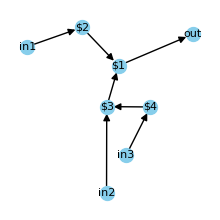

In [6]:
# Path to the JSON file
json_file_path = '/home/gridsan/spalacios/Designing complex biological circuits with deep neural networks/dgd/tests/Circuit score calculation testing/Cello 2 3-input designs (log interpolation tox)/0x0B_V2/0x0B_V2_outputNetlist.json'


# Load JSON data from file
json_data = load_json_file(json_file_path)

# Create a DAG from the JSON data
dag = create_dag_from_json(json_data)

# Print the nodes and edges in the DAG
print("Nodes in the DAG:")
for node in dag.nodes(data=True):
    print(node)

print("\nEdges in the DAG:")
for edge in dag.edges(data=True):
    print(edge)
    
G = dag

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()      

In [7]:
# Example usage:
folder_path = 'output_run_postech_1'
output_run_postech_1_graphs = convert_folder_to_dags(folder_path)

Processing file: output_run_postech_1/0xA5/0xA5_outputNetlist.json
Processing file: output_run_postech_1/0xA2/0xA2_outputNetlist.json
Processing file: output_run_postech_1/0xB4/0xB4_outputNetlist.json
Processing file: output_run_postech_1/0xDA/0xDA_outputNetlist.json
Processing file: output_run_postech_1/0xDF/0xDF_outputNetlist.json
Processing file: output_run_postech_1/0xB3/0xB3_outputNetlist.json
Processing file: output_run_postech_1/0xD8/0xD8_outputNetlist.json
Processing file: output_run_postech_1/0xAB/0xAB_outputNetlist.json
Processing file: output_run_postech_1/0xAE/0xAE_outputNetlist.json
Processing file: output_run_postech_1/0xBC/0xBC_outputNetlist.json
Processing file: output_run_postech_1/0xD1/0xD1_outputNetlist.json
Processing file: output_run_postech_1/0xBD/0xBD_outputNetlist.json
Processing file: output_run_postech_1/0xB2/0xB2_outputNetlist.json
Processing file: output_run_postech_1/0xB5/0xB5_outputNetlist.json
Processing file: output_run_postech_1/0xA3/0xA3_outputNetlist.

In [8]:
def is_hex(s):
    try:
        int(s, 16)
        return True
    except ValueError:
        return False


output_run_postech_1_graphs = {k: v for k, v in output_run_postech_1_graphs.items() if is_hex(k)}
output_run_postech_1_graphs

{'0xA5': <networkx.classes.digraph.DiGraph at 0x7ff3306fb100>,
 '0xA2': <networkx.classes.digraph.DiGraph at 0x7ff341009850>,
 '0xB4': <networkx.classes.digraph.DiGraph at 0x7ff2c01d1e20>,
 '0xDA': <networkx.classes.digraph.DiGraph at 0x7ff330720ac0>,
 '0xDF': <networkx.classes.digraph.DiGraph at 0x7ff2c01daac0>,
 '0xB3': <networkx.classes.digraph.DiGraph at 0x7ff2c01dad60>,
 '0xD8': <networkx.classes.digraph.DiGraph at 0x7ff2c0115a00>,
 '0xAB': <networkx.classes.digraph.DiGraph at 0x7ff2c01dabe0>,
 '0xAE': <networkx.classes.digraph.DiGraph at 0x7ff3408b9280>,
 '0xBC': <networkx.classes.digraph.DiGraph at 0x7ff2c01227f0>,
 '0xD1': <networkx.classes.digraph.DiGraph at 0x7ff2c80d6100>,
 '0xBD': <networkx.classes.digraph.DiGraph at 0x7ff2c80d6070>,
 '0xB2': <networkx.classes.digraph.DiGraph at 0x7ff2c80d6130>,
 '0xB5': <networkx.classes.digraph.DiGraph at 0x7ff2c80d6190>,
 '0xA3': <networkx.classes.digraph.DiGraph at 0x7ff2c80d61f0>,
 '0xBE': <networkx.classes.digraph.DiGraph at 0x7ff2c80

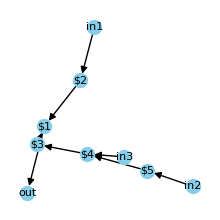

In [9]:
G = output_run_postech_1_graphs["0x02"]

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  

In [6]:
folder_path = 'output_run_postech_1_no_BetI_NOR_no_tandem_output'
output_run_postech_1_no_BetI_graphs = convert_folder_to_dags(folder_path)

Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xA5/0xA5_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xA2/0xA2_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xB4/0xB4_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xDA/0xDA_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xDF/0xDF_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xB3/0xB3_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xD8/0xD8_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xAB/0xAB_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xAE/0xAE_outputNetlist.json
Processing file: output_run_postech_1_no_BetI_NOR_no_tandem_output/0xBC/0xBC_outputNetlist.json
Processing file: output_run_postech_1_no

In [10]:
len(output_run_postech_1_no_BetI_graphs)

222

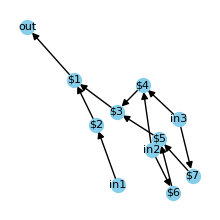

In [11]:
G = output_run_postech_1_no_BetI_graphs["0x09"]

plt.figure(figsize=(2, 2))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, 
        edge_color='k', linewidths=1, font_size=8, 
        arrows=True, arrowsize=10)
plt.show()  


Bar graphs

/var/folders/86/db8pgks93ns7hycjy88b_fxw0000gn/T/ipykernel_76435/2713258257.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels for better readability


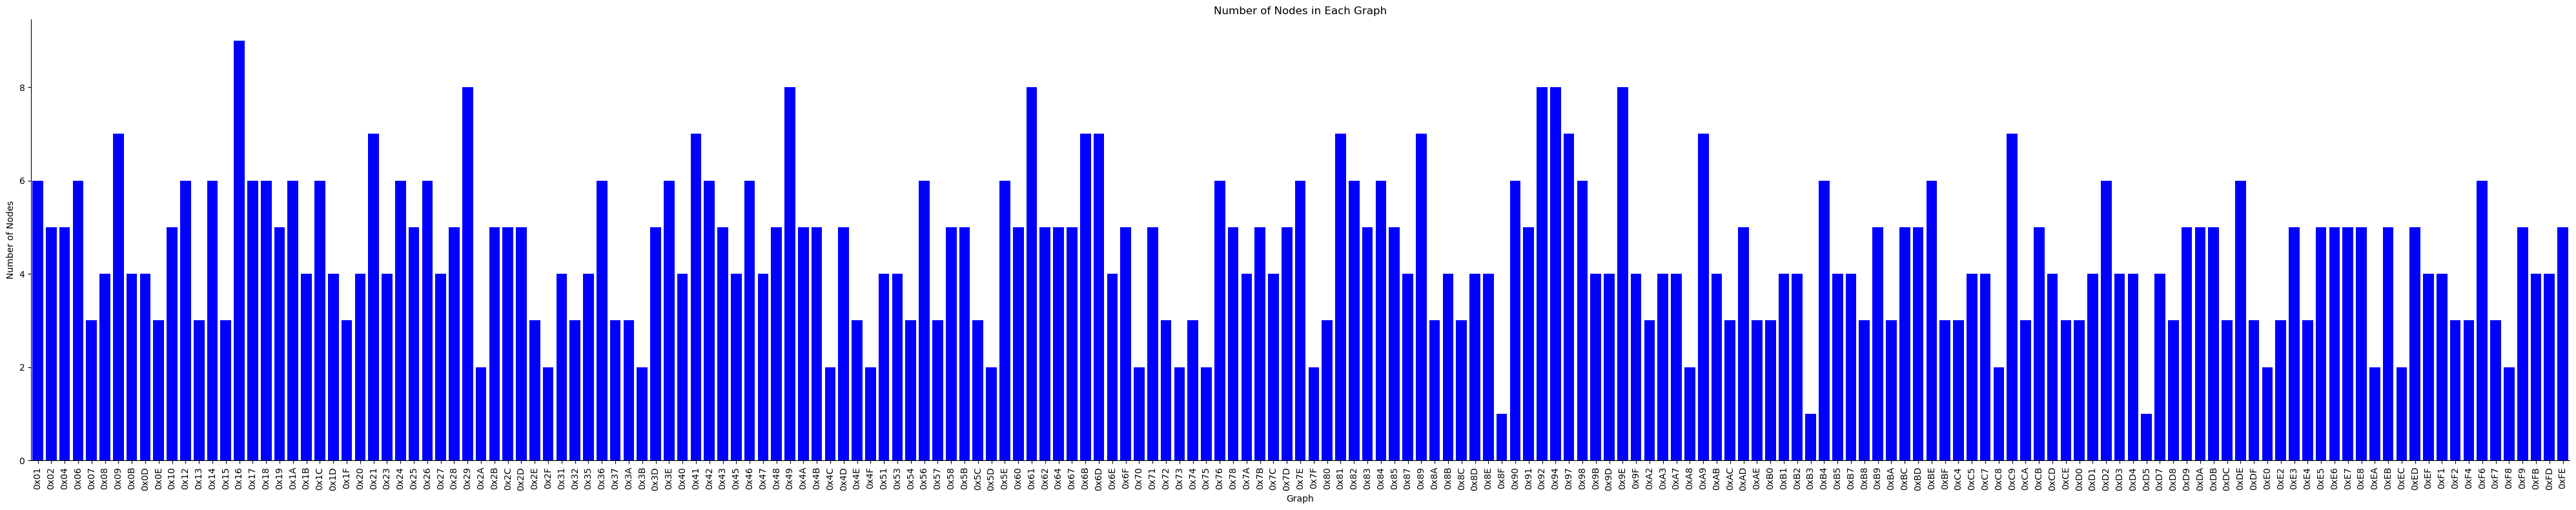

In [ ]:
# Dictionary to store the node counts
node_counts = {}

# Count the number of nodes in each graph
for graph_name, graph in output_run_postech_1_graphs.items():
    # Calculate the number of nodes without incoming edges
    nodes_with_no_incoming_edges = [n for n in graph.nodes() if graph.in_degree(n) == 0]
    
    # Filter out graphs where the number of nodes without incoming edges is not 3
    if len(nodes_with_no_incoming_edges) == 3:
        node_counts[graph_name] = graph.number_of_nodes() - 4

# Sort the keys based on their hexadecimal value
sorted_keys = sorted(node_counts.keys(), key=lambda x: int(x, 16))

# Create sorted labels and values based on the sorted keys
labels = sorted_keys
values = [node_counts[key] for key in labels]

# Create a bar chart
fig, ax = plt.subplots(figsize=(40, 8))
bars = ax.bar(labels, values, color='blue')

# Formatting the plot
ax.set_xlabel('Graph')
ax.set_ylabel('Number of Nodes')
ax.set_title('Number of Nodes in Each Graph')
ax.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels for better readability

# Set the x-limits to fit the bars more snugly
ax.set_xlim(-0.5, len(labels) - 0.5)  # Adjust the limits to reduce space

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()



/var/folders/86/db8pgks93ns7hycjy88b_fxw0000gn/T/ipykernel_76435/813767481.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels for better readability


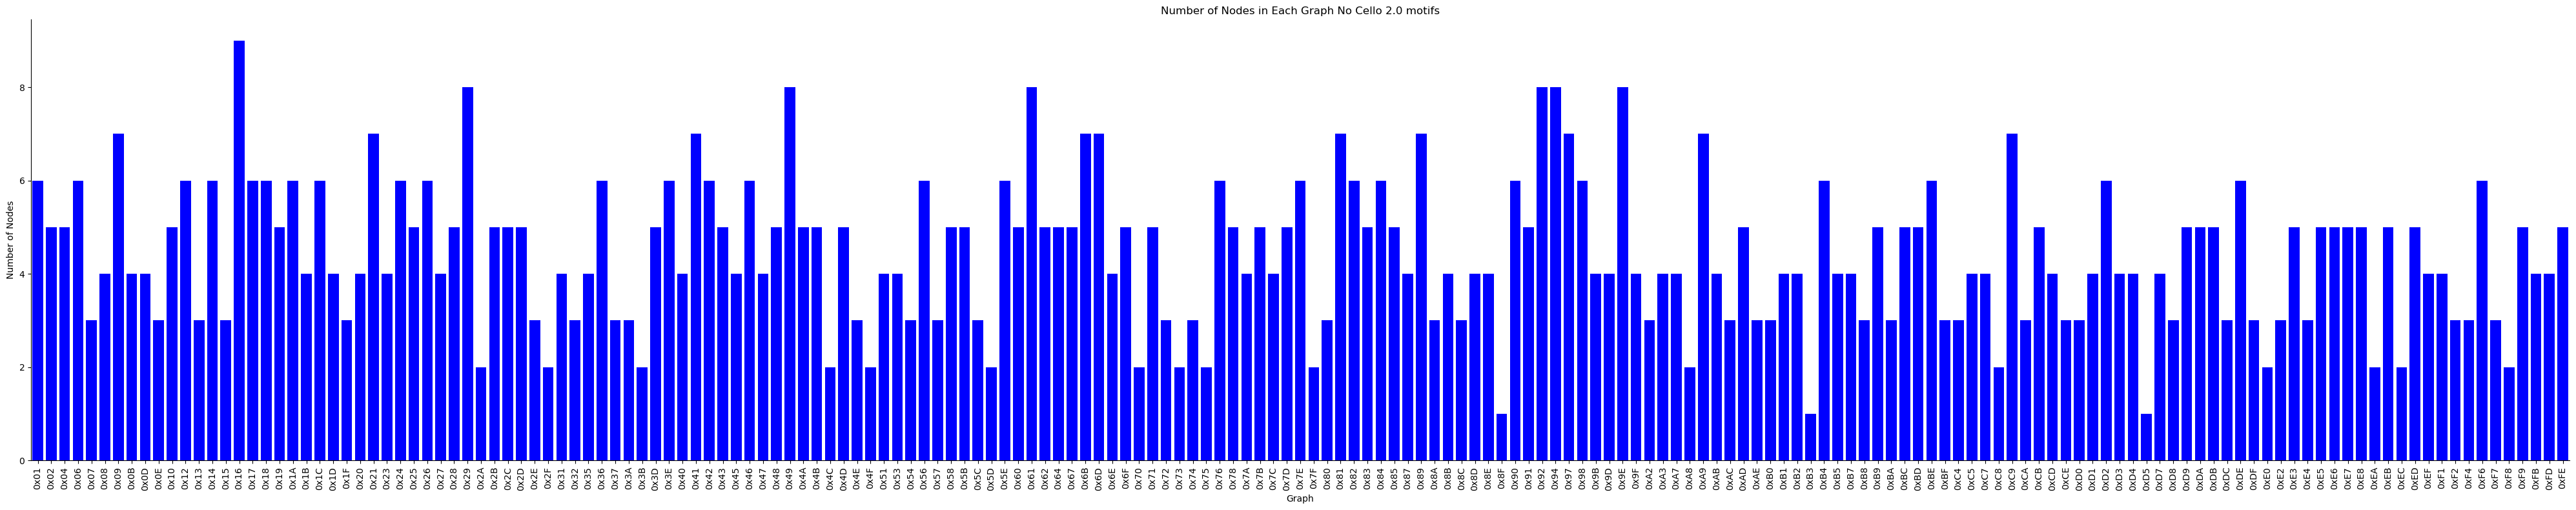

In [13]:
# Dictionary to store the node counts
node_counts = {}

# Count the number of nodes in each graph
for graph_name, graph in output_run_postech_1_no_BetI_graphs.items():
    # Calculate the number of nodes without incoming edges
    nodes_with_no_incoming_edges = [n for n in graph.nodes() if graph.in_degree(n) == 0]
    
    # Filter out graphs where the number of nodes without incoming edges is not 3
    if len(nodes_with_no_incoming_edges) == 3:
        node_counts[graph_name] = graph.number_of_nodes() - 4

# Sort the keys based on their hexadecimal value
sorted_keys = sorted(node_counts.keys(), key=lambda x: int(x, 16))

# Create sorted labels and values based on the sorted keys
labels = sorted_keys
values = [node_counts[key] for key in labels]

# Create a bar chart
fig, ax = plt.subplots(figsize=(40, 8))
bars = ax.bar(labels, values, color='blue')

# Formatting the plot
ax.set_xlabel('Graph')
ax.set_ylabel('Number of Nodes')
ax.set_title('Number of Nodes in Each Graph No Cello 2.0 motifs')
ax.set_xticklabels(labels, rotation=90)  # Rotate x-axis labels for better readability

# Set the x-limits to fit the bars more snugly
ax.set_xlim(-0.5, len(labels) - 0.5)  # Adjust the limits to reduce space

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

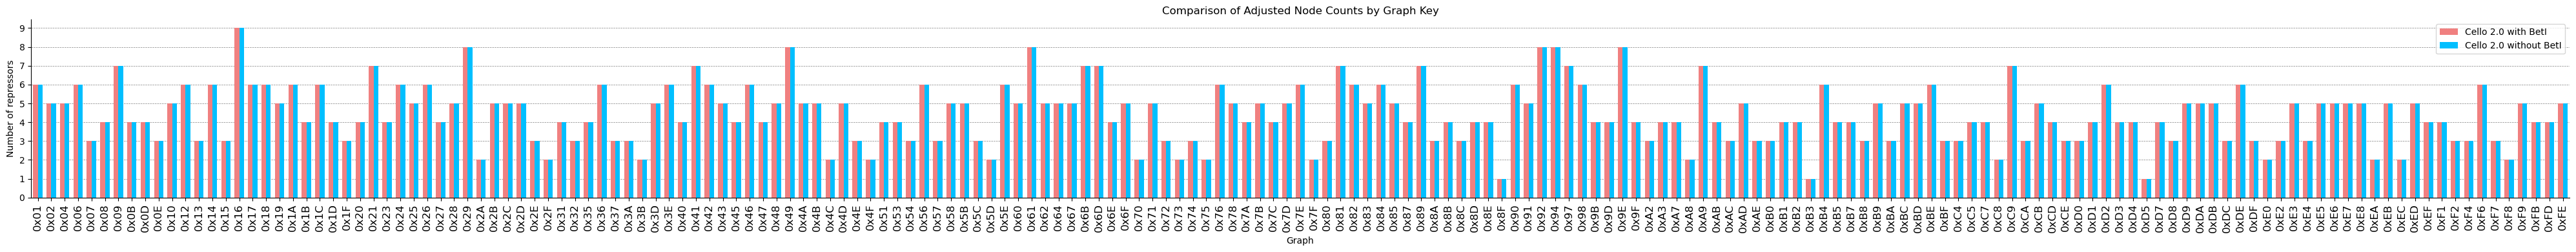

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.ticker import MultipleLocator

graphs_dict1 = output_run_postech_1_graphs  # Example dictionaries
graphs_dict2 = output_run_postech_1_no_BetI_graphs

# Function to check if a graph has exactly 3 nodes with no incoming edges
def has_exactly_three_sink_nodes(graph):
    sink_nodes = [node for node in graph.nodes() if graph.in_degree(node) == 0]
    return len(sink_nodes) == 3

# Merge keys from both dictionaries and sort them
all_keys = sorted(set(graphs_dict1.keys()).union(graphs_dict2.keys()), key=lambda x: int(x, 16))

# Filter keys where both graphs (if exist) have exactly 3 sink nodes
filtered_keys = [key for key in all_keys if 
                 has_exactly_three_sink_nodes(graphs_dict1.get(key, nx.empty_graph(0))) and 
                 has_exactly_three_sink_nodes(graphs_dict2.get(key, nx.empty_graph(0)))]

# Function to get node count minus 4
def get_adjusted_node_count(graph):
    return graph.number_of_nodes() - 4

# Prepare data lists for plotting using filtered keys
values1 = [get_adjusted_node_count(graphs_dict1.get(key, nx.empty_graph(4))) for key in filtered_keys]
values2 = [get_adjusted_node_count(graphs_dict2.get(key, nx.empty_graph(4))) for key in filtered_keys]

# Create a bar chart
fig, ax = plt.subplots(figsize=(40, 4))
x = np.arange(len(filtered_keys))  # the label locations
width = 0.35  # the width of the bars

bars1 = ax.bar(x - width/2, values1, width, label='Cello 2.0 with BetI', color='lightcoral', zorder=3)
bars2 = ax.bar(x + width/2, values2, width, label='Cello 2.0 without BetI', color='deepskyblue', zorder=3)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Graph')
ax.set_ylabel('Number of repressors')
ax.set_title('Comparison of Adjusted Node Counts by Graph Key')
ax.set_xticks(x)
ax.set_xticklabels(filtered_keys, fontsize=8)
ax.legend()

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the x-limits to fit the bars more snugly
ax.set_xlim(-0.5, len(filtered_keys) - 0.5)

# Set y-ticks every 1 unit and add horizontal grid lines
ax.set_yticks(np.arange(0, max(max(values1), max(values2)) + 1, 1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5, zorder=0)  # Grid behind bars

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=90, fontsize=12)

plt.tight_layout()
plt.show()


In [15]:
len(output_run_postech_1_graphs)/4

55.5

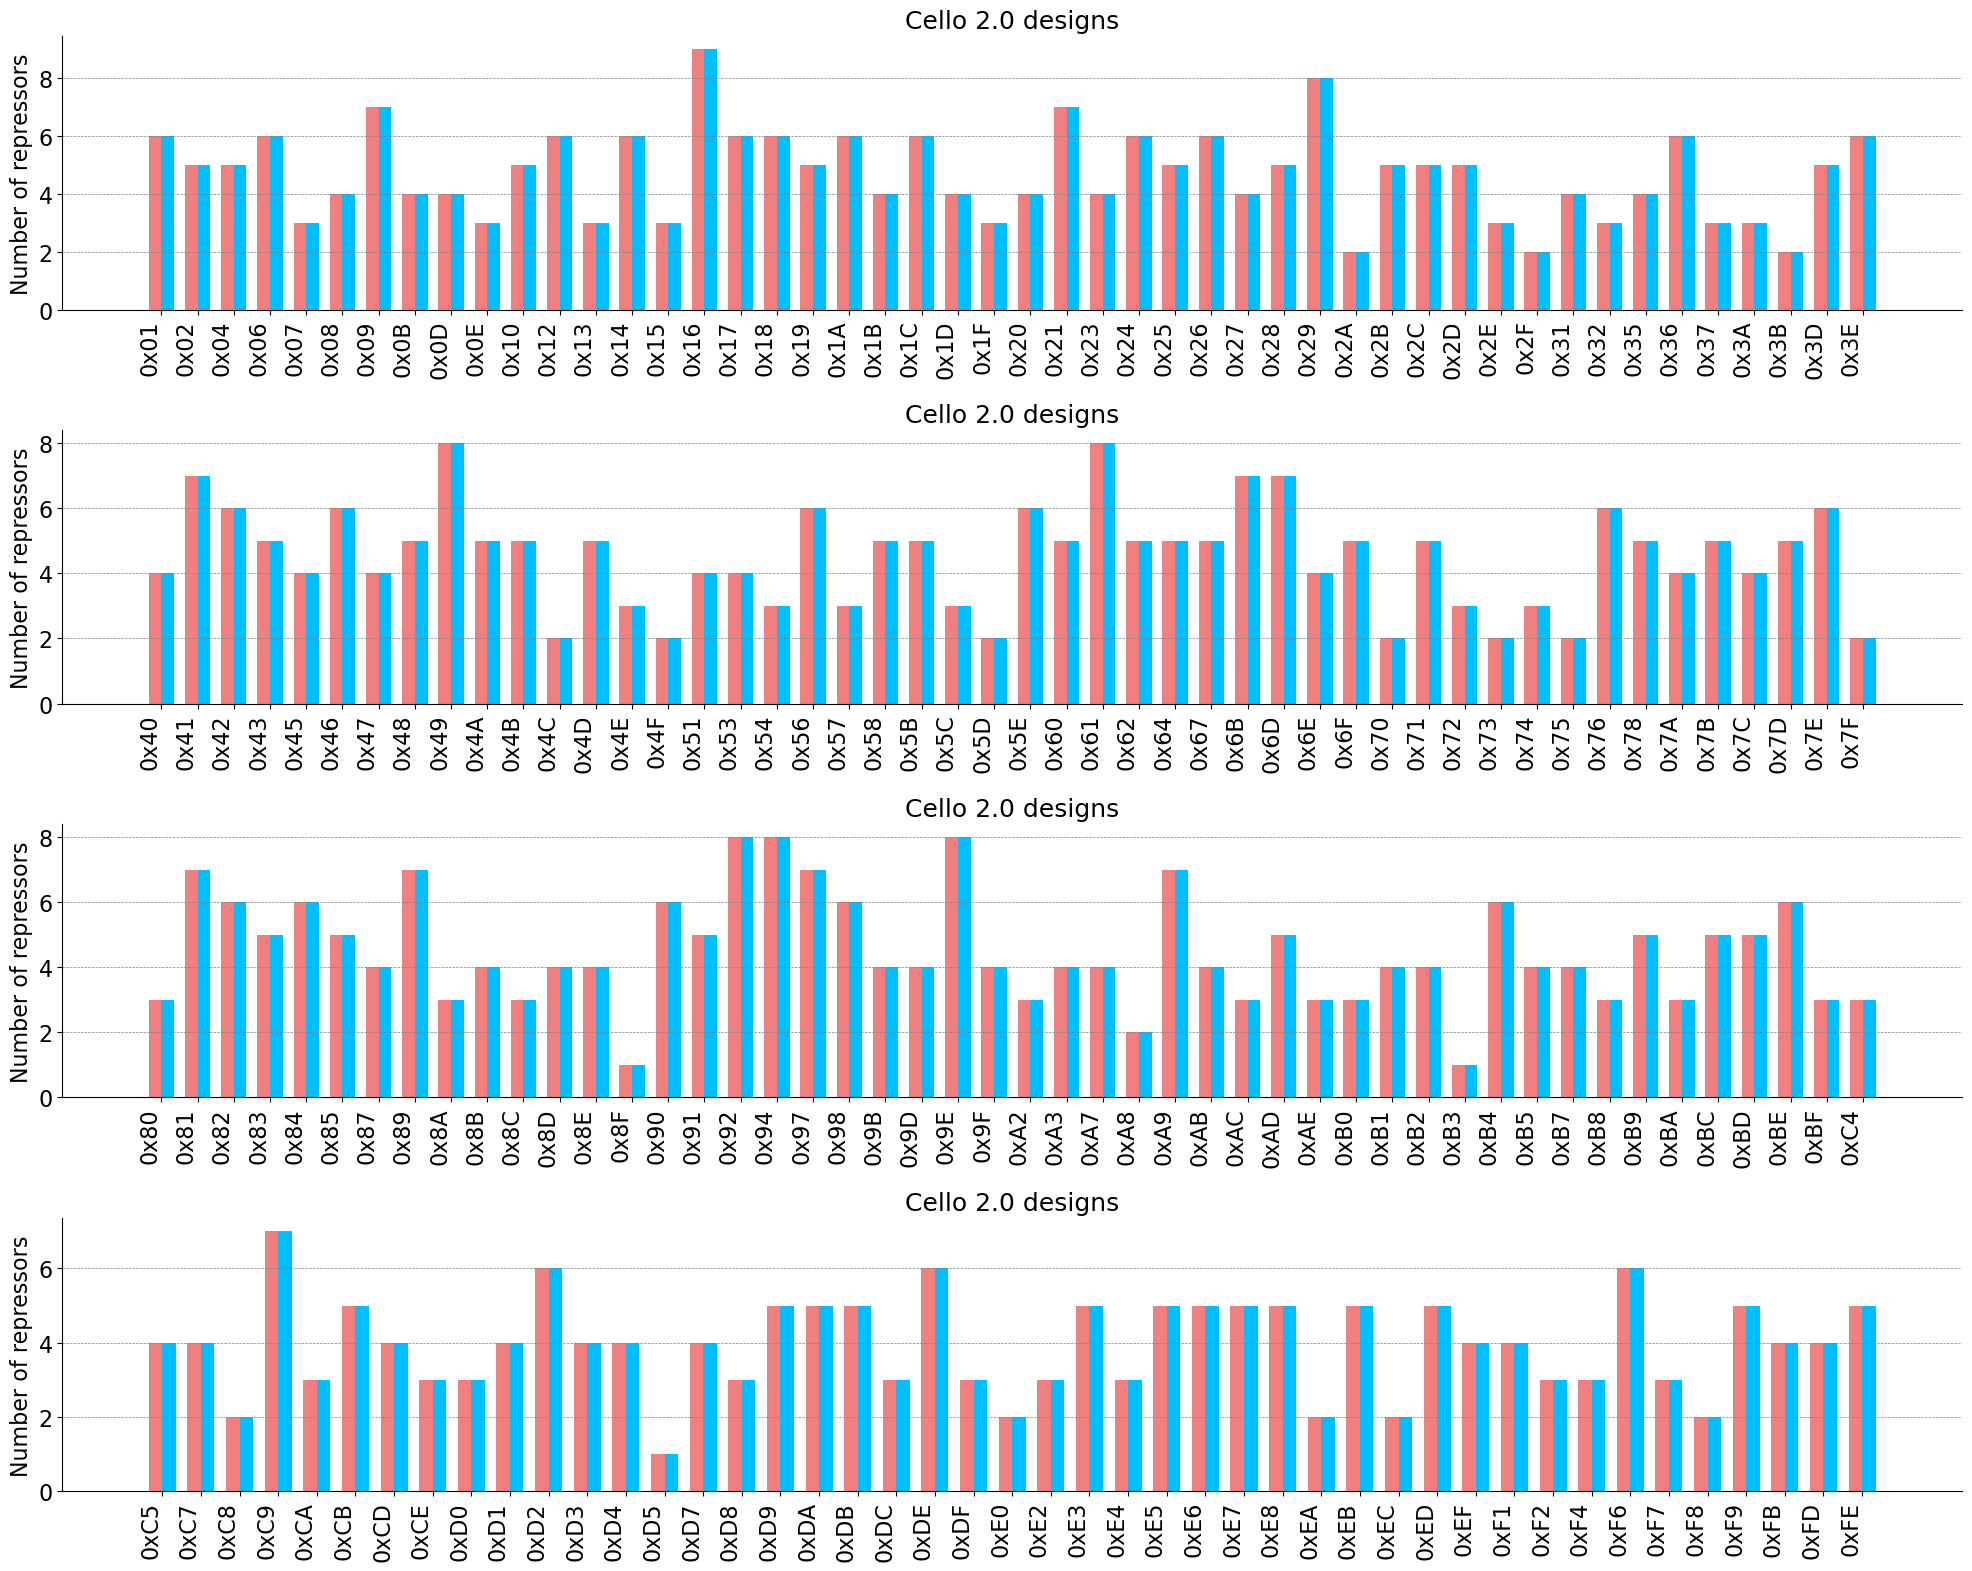

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Update matplotlib's runtime configuration (rc) to increase font sizes
plt.rcParams.update({
    'font.size': 16,            # Default font size for all text
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 18,       # Font size for subplot titles
    'xtick.labelsize': 16,      # Font size for X-axis tick labels
    'ytick.labelsize': 16,      # Font size for Y-axis tick labels
    'legend.fontsize': 16       # Font size for legend
})

# Assuming graphs_dict1 and graphs_dict2 are your graph dictionaries
# and output_run_postech_1_graphs, output_run_postech_1_nocellomotifs_graphs are defined elsewhere

# Function to check if a graph has exactly 3 nodes with no incoming edges
def has_exactly_three_sink_nodes(graph):
    sink_nodes = [node for node in graph.nodes() if graph.in_degree(node) == 0]
    return len(sink_nodes) == 3

# Merge and sort keys
all_keys = sorted(set(graphs_dict1.keys()).union(graphs_dict2.keys()), key=lambda x: int(x, 16))

# Filter keys
filtered_keys = [key for key in all_keys if 
                 has_exactly_three_sink_nodes(graphs_dict1.get(key, nx.empty_graph(0))) and 
                 has_exactly_three_sink_nodes(graphs_dict2.get(key, nx.empty_graph(0)))]

# Adjusted node count
def get_adjusted_node_count(graph):
    return graph.number_of_nodes() - 4

values1 = [get_adjusted_node_count(graphs_dict1.get(key, nx.empty_graph(4))) for key in filtered_keys]
values2 = [get_adjusted_node_count(graphs_dict2.get(key, nx.empty_graph(4))) for key in filtered_keys]

# Parameters
num_keys_per_subplot = 48 # You can adjust this number based on your specific needs
num_subplots = len(filtered_keys) // num_keys_per_subplot + (len(filtered_keys) % num_keys_per_subplot > 0)

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(20, num_subplots*4))  # Adjust figsize as needed
axes = np.array(axes).flatten()  # Flatten in case we have a single subplot

for i, ax in enumerate(axes):
    start = i * num_keys_per_subplot
    end = start + num_keys_per_subplot
    keys_slice = filtered_keys[start:end]
    values1_slice = values1[start:end]
    values2_slice = values2[start:end]
    x = np.arange(len(keys_slice))
    width = 0.35  # Bar width

    ax.bar(x - width/2, values1_slice, width, label='Cello 2.0 with precomputed motifs', color='lightcoral')
    ax.bar(x + width/2, values2_slice, width, label='Cello 2.0 without precomputed motifs', color='deepskyblue')

    ax.set_ylabel('Number of repressors')
    ax.set_title(f'Cello 2.0 designs')
    ax.set_xticks(x)
    ax.set_xticklabels(keys_slice, rotation=90, ha='right')  # Remove fontsize here
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5)
    #if i == 0:  # Add legend only on the first subplot for clarity
    #    ax.legend()

plt.tight_layout()
plt.show()



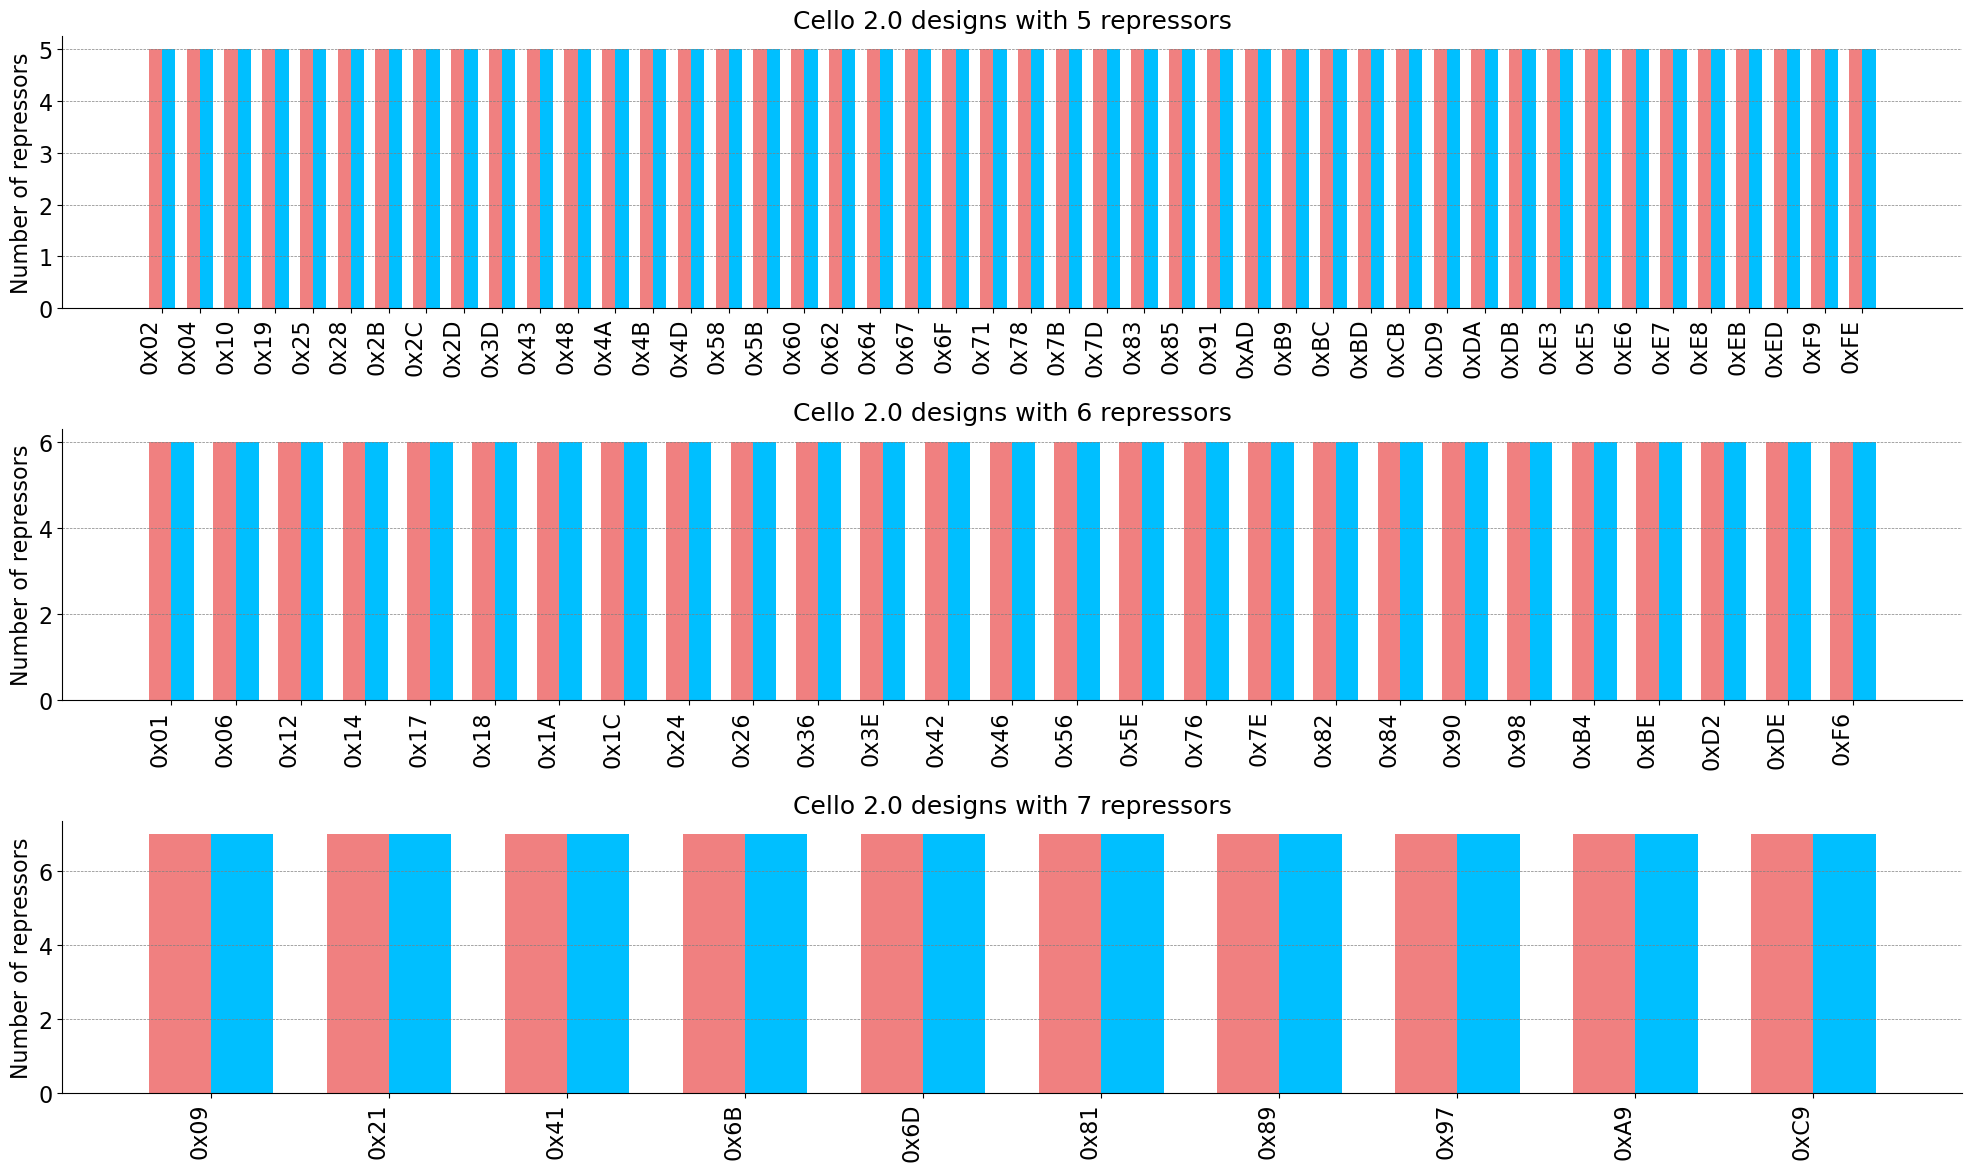

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Update matplotlib's runtime configuration (rc) to increase font sizes
plt.rcParams.update({
    'font.size': 16,            # Default font size for all text
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 18,       # Font size for subplot titles
    'xtick.labelsize': 16,      # Font size for X-axis tick labels
    'ytick.labelsize': 16,      # Font size for Y-axis tick labels
    'legend.fontsize': 16       # Font size for legend
})

# Assuming graphs_dict1 and graphs_dict2 are your graph dictionaries
# and output_run_postech_1_graphs, output_run_postech_1_nocellomotifs_graphs are defined elsewhere

# Function to check if a graph has exactly 3 nodes with no incoming edges
def has_exactly_three_sink_nodes(graph):
    sink_nodes = [node for node in graph.nodes() if graph.in_degree(node) == 0]
    return len(sink_nodes) == 3

# Merge and sort keys
all_keys = sorted(set(graphs_dict1.keys()).union(graphs_dict2.keys()), key=lambda x: int(x, 16))

# Filter keys
filtered_keys = [key for key in all_keys if 
                 has_exactly_three_sink_nodes(graphs_dict1.get(key, nx.empty_graph(0))) and 
                 has_exactly_three_sink_nodes(graphs_dict2.get(key, nx.empty_graph(0)))]

# Adjusted node count
def get_adjusted_node_count(graph):
    return graph.number_of_nodes() - 4

values1 = [get_adjusted_node_count(graphs_dict1.get(key, nx.empty_graph(4))) for key in filtered_keys]
values2 = [get_adjusted_node_count(graphs_dict2.get(key, nx.empty_graph(4))) for key in filtered_keys]

# Filter values to only include those where the red bar (values1) is exactly 5, 6, or 7
filtered_keys_5_repressors = [key for key, v1 in zip(filtered_keys, values1) if v1 == 5]
filtered_keys_6_repressors = [key for key, v1 in zip(filtered_keys, values1) if v1 == 6]
filtered_keys_7_repressors = [key for key, v1 in zip(filtered_keys, values1) if v1 == 7]

values1_5_repressors = [v1 for v1 in values1 if v1 == 5]
values2_5_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_5_repressors]

values1_6_repressors = [v1 for v1 in values1 if v1 == 6]
values2_6_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_6_repressors]

values1_7_repressors = [v1 for v1 in values1 if v1 == 7]
values2_7_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_7_repressors]

# Ensure all slices are aligned correctly
values1_5_repressors = [v1 for key, v1 in zip(filtered_keys, values1) if key in filtered_keys_5_repressors]
values2_5_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_5_repressors]

values1_6_repressors = [v1 for key, v1 in zip(filtered_keys, values1) if key in filtered_keys_6_repressors]
values2_6_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_6_repressors]

values1_7_repressors = [v1 for key, v1 in zip(filtered_keys, values1) if key in filtered_keys_7_repressors]
values2_7_repressors = [v2 for key, v2 in zip(filtered_keys, values2) if key in filtered_keys_7_repressors]

# Parameters
num_keys_per_subplot = 48 # You can adjust this number based on your specific needs

# Determine the number of subplots for each repressor count
num_subplots_5 = len(filtered_keys_5_repressors) // num_keys_per_subplot + (len(filtered_keys_5_repressors) % num_keys_per_subplot > 0)
num_subplots_6 = len(filtered_keys_6_repressors) // num_keys_per_subplot + (len(filtered_keys_6_repressors) % num_keys_per_subplot > 0)
num_subplots_7 = len(filtered_keys_7_repressors) // num_keys_per_subplot + (len(filtered_keys_7_repressors) % num_keys_per_subplot > 0)

# Total number of subplots
total_subplots = num_subplots_5 + num_subplots_6 + num_subplots_7

# Create a figure with multiple subplots
fig, axes = plt.subplots(total_subplots, 1, figsize=(20, total_subplots*4))  # Adjust figsize as needed
axes = np.array(axes).flatten()  # Flatten in case we have a single subplot

subplot_idx = 0

# Plot for 5 repressors
for i in range(num_subplots_5):
    ax = axes[subplot_idx]
    subplot_idx += 1
    start = i * num_keys_per_subplot
    end = start + num_keys_per_subplot
    keys_slice = filtered_keys_5_repressors[start:end]
    values1_slice = values1_5_repressors[start:end]
    values2_slice = values2_5_repressors[start:end]
    x = np.arange(len(keys_slice))
    width = 0.35  # Bar width

    ax.bar(x - width/2, values1_slice, width, label='Cello 2.0 with precomputed motifs', color='lightcoral')
    ax.bar(x + width/2, values2_slice, width, label='Cello 2.0 without precomputed motifs', color='deepskyblue')

    ax.set_ylabel('Number of repressors')
    ax.set_title('Cello 2.0 designs with 5 repressors')
    ax.set_xticks(x)
    ax.set_xticklabels(keys_slice, rotation=90, ha='right')  # Remove fontsize here
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5)

# Plot for 6 repressors
for i in range(num_subplots_6):
    ax = axes[subplot_idx]
    subplot_idx += 1
    start = i * num_keys_per_subplot
    end = start + num_keys_per_subplot
    keys_slice = filtered_keys_6_repressors[start:end]
    values1_slice = values1_6_repressors[start:end]
    values2_slice = values2_6_repressors[start:end]
    x = np.arange(len(keys_slice))
    width = 0.35  # Bar width

    ax.bar(x - width/2, values1_slice, width, label='Cello 2.0 with precomputed motifs', color='lightcoral')
    ax.bar(x + width/2, values2_slice, width, label='Cello 2.0 without precomputed motifs', color='deepskyblue')

    ax.set_ylabel('Number of repressors')
    ax.set_title('Cello 2.0 designs with 6 repressors')
    ax.set_xticks(x)
    ax.set_xticklabels(keys_slice, rotation=90, ha='right')  # Remove fontsize here
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5)

# Plot for 7 repressors
for i in range(num_subplots_7):
    ax = axes[subplot_idx]
    subplot_idx += 1
    start = i * num_keys_per_subplot
    end = start + num_keys_per_subplot
    keys_slice = filtered_keys_7_repressors[start:end]
    values1_slice = values1_7_repressors[start:end]
    values2_slice = values2_7_repressors[start:end]
    x = np.arange(len(keys_slice))
    width = 0.35  # Bar width

    ax.bar(x - width/2, values1_slice, width, label='Cello 2.0 with BetI', color='lightcoral')
    ax.bar(x + width/2, values2_slice, width, label='Cello 2.0 without BetI', color='deepskyblue')

    ax.set_ylabel('Number of repressors')
    ax.set_title('Cello 2.0 designs with 7 repressors')
    ax.set_xticks(x)
    ax.set_xticklabels(keys_slice, rotation=90, ha='right')  # Remove fontsize here
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5)

plt.tight_layout()
plt.show()


Scores

In [18]:
import os
import re

def extract_scores(base_folder):
    scores_dict = {}
    
    # Walk through all directories and files in the base folder
    for root, dirs, files in os.walk(base_folder):
        for dir_name in dirs:
            # Construct path to the potential log file
            log_path = os.path.join(root, dir_name, 'log.log')
            
            # Initialize with None in case the file or score doesn't exist
            score = None
            inputs_valid = False
            
            # Check if the log file exists
            if os.path.exists(log_path):
                with open(log_path, 'r') as file:
                    # Read the file
                    content = file.read()
                    
                    # Search for the total number of inputs
                    inputs_match = re.search(r"Total number of inputs:\s+(\d+)", content)
                    if inputs_match and int(inputs_match.group(1)) == 3:
                        inputs_valid = True
                    
                    # Search for the score pattern, but only if the number of inputs is valid
                    if inputs_valid:
                        match = re.search(r"Score:\s+(\d+\.\d+)", content)
                        if match:
                            score = float(match.group(1))
                            # Store the score in the dictionary with the subfolder name as the key
                            scores_dict[dir_name] = score

    return scores_dict





In [19]:

# Usage example
base_folder = 'output_run_postech_1'
output_run_postech_1_scores = extract_scores(base_folder)



output_run_postech_1_scores = {k: v for k, v in output_run_postech_1_scores.items() if is_hex(k)}


print(output_run_postech_1_scores)

{'0xA2': 284.16, '0xB4': 1.0, '0xDA': 0.99, '0xDF': 31.17, '0xD8': 32.3, '0xAB': 28.81, '0xAE': 54.05, '0xBC': 26.37, '0xD1': 74.47, '0xB2': 3.03, '0xBE': 20.15, '0xD0': 352.34, '0xD7': 55.9, '0xD9': 53.79, '0x94': 0.64, '0x60': 17.5, '0x0E': 32.49, '0x0B': 607.22, '0x67': 56.53, '0x3D': 8.83, '0x51': 631.17, '0x56': 0.89, '0x02': 72.39, '0x9D': 28.15, '0x3B': 212.9, '0x57': 101.85, '0x3E': 23.76, '0x0D': 109.43, '0x61': 0.28, '0x35': 119.35, '0x32': 19.69, '0x04': 28.97, '0x6F': 4.08, '0x19': 1.43, '0x26': 1.0, '0x8A': 277.53, '0x10': 142.1, '0x7E': 1.82, '0x28': 1.0, '0x8F': 30.38, '0x43': 45.91, '0x2F': 16.46, '0x2A': 276.27, '0x72': 19.69, '0x75': 49.07, '0x81': 1.0, '0x29': 0.53, '0x16': 1.0, '0x7D': 6.88, '0x4B': 15.94, '0x27': 52.37, '0x20': 109.01, '0x80': 355.89, '0x74': 61.64, '0x73': 309.92, '0x1F': 62.37, '0x87': 7.6, '0x45': 266.72, '0x89': 0.96, '0xCA': 22.82, '0xE3': 10.4, '0xF2': 23.05, '0xC8': 50.07, '0xFB': 95.54, '0xFE': 19.65, '0xF4': 66.88, '0xE2': 20.05, '0xFD': 4

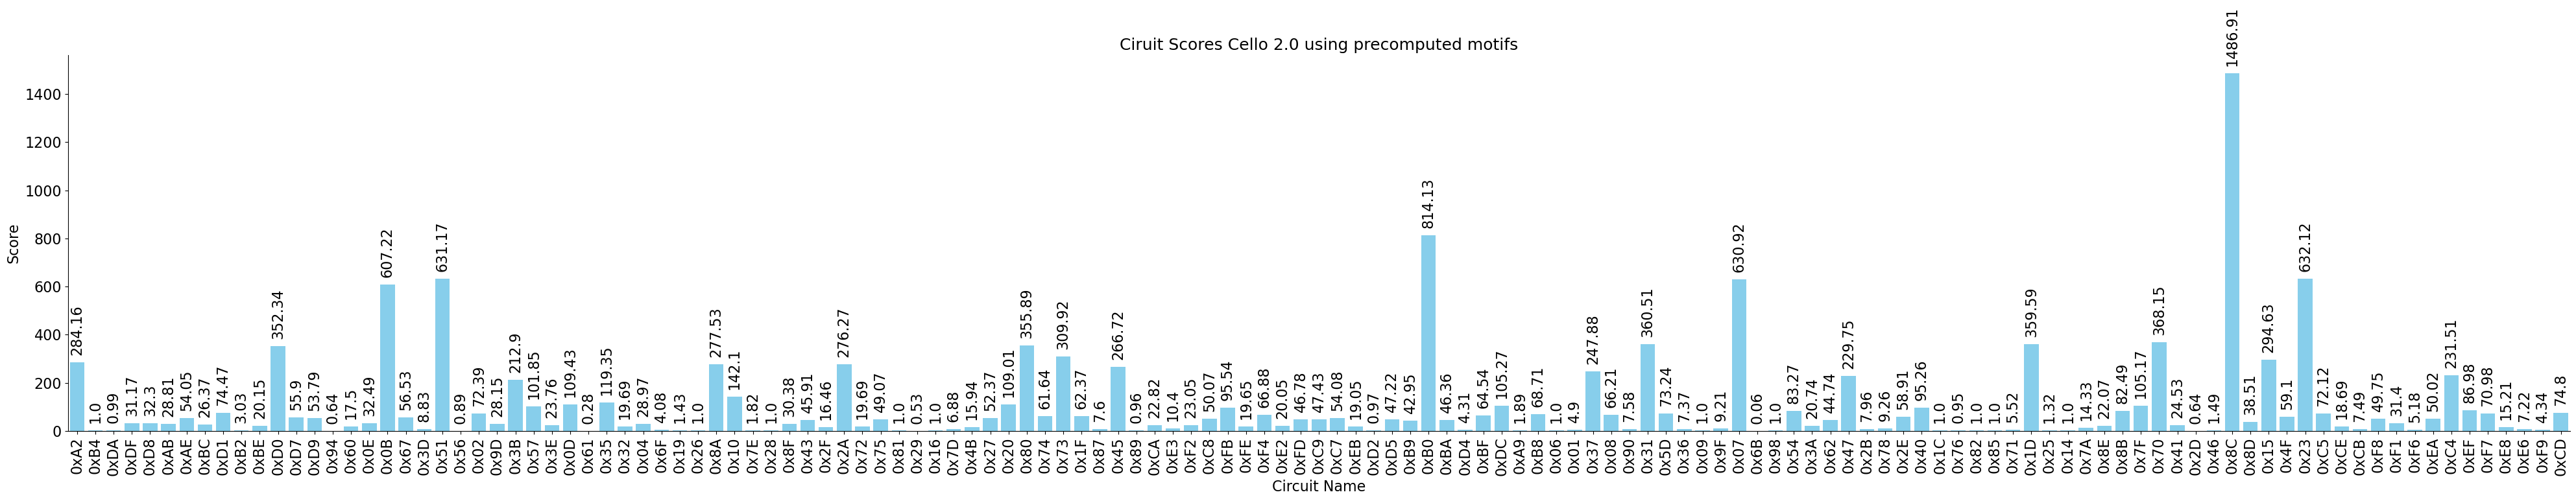

In [20]:
import matplotlib.pyplot as plt

scores_dict = output_run_postech_1_scores
labels = list(scores_dict.keys())
values = [scores_dict[key] if scores_dict[key] is not None else 0 for key in labels]  # Replace None with 0

# Create a bar chart
plt.figure(figsize=(40, 8))
bars = plt.bar(labels, values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    # Check if yval is not zero before rounding to avoid unnecessary labels
    if yval != 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * max(values), round(yval, 2), va='bottom', ha='center', rotation=90)  # Increased y position by adding 5% of the max value

plt.xlabel('Circuit Name')
plt.ylabel('Score')
plt.title('Ciruit Scores Cello 2.0 using precomputed motifs')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap

# Set the x-limits to fit the bars more snugly
plt.xlim(-0.5, len(labels)-0.5)

# Removing the top and right spines
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


In [21]:
# Usage example
base_folder = 'output_run_postech_1_no_BetI_NOR_no_tandem_output'
output_run_postech_1_no_BetI_scores = extract_scores(base_folder)
print(output_run_postech_1_no_BetI_scores)

{'0xA2': 284.16, '0xB4': 37.7, '0xDA': 0.99, '0xDF': 106.14, '0xD8': 47.96, '0xAB': 19.05, '0xAE': 63.08, '0xBC': 15.08, '0xD1': 100.78, '0xB2': 38.27, '0xBE': 29.14, '0xD0': 352.34, '0xD7': 132.96, '0xD9': 20.37, '0x94': 0.03, '0x60': 4.34, '0x0E': 93.1, '0x0B': 178.52, '0x67': 167.87, '0x3D': 30.83, '0x51': 145.6, '0x56': 0.94, '0x02': 141.7, '0x9D': 46.64, '0x3B': 212.9, '0x57': 277.4, '0x3E': 1.78, '0x0D': 116.9, '0x61': 0.3, '0x35': 110.85, '0x32': 93.12, '0x9E': 1.66, '0x04': 47.22, '0x6F': 38.08, '0x19': 50.67, '0x26': 8.82, '0x8A': 277.53, '0x10': 74.01, '0x7E': 15.68, '0x28': 15.84, '0x8F': 77.98, '0x43': 89.43, '0x2F': 81.47, '0x2A': 141.39, '0x72': 49.49, '0x75': 223.25, '0x81': 1.0, '0x29': 1.0, '0x16': 1.0, '0x7D': 46.86, '0x4B': 33.71, '0x27': 398.33, '0x20': 616.69, '0x80': 110.25, '0x74': 64.2, '0x73': 564.57, '0x1F': 98.26, '0x87': 60.97, '0x45': 328.54, '0x89': 7.02, '0xCA': 42.23, '0xE3': 4.5, '0xF2': 92.95, '0xC8': 58.06, '0xFB': 663.0, '0xFE': 71.33, '0xF4': 79.91,

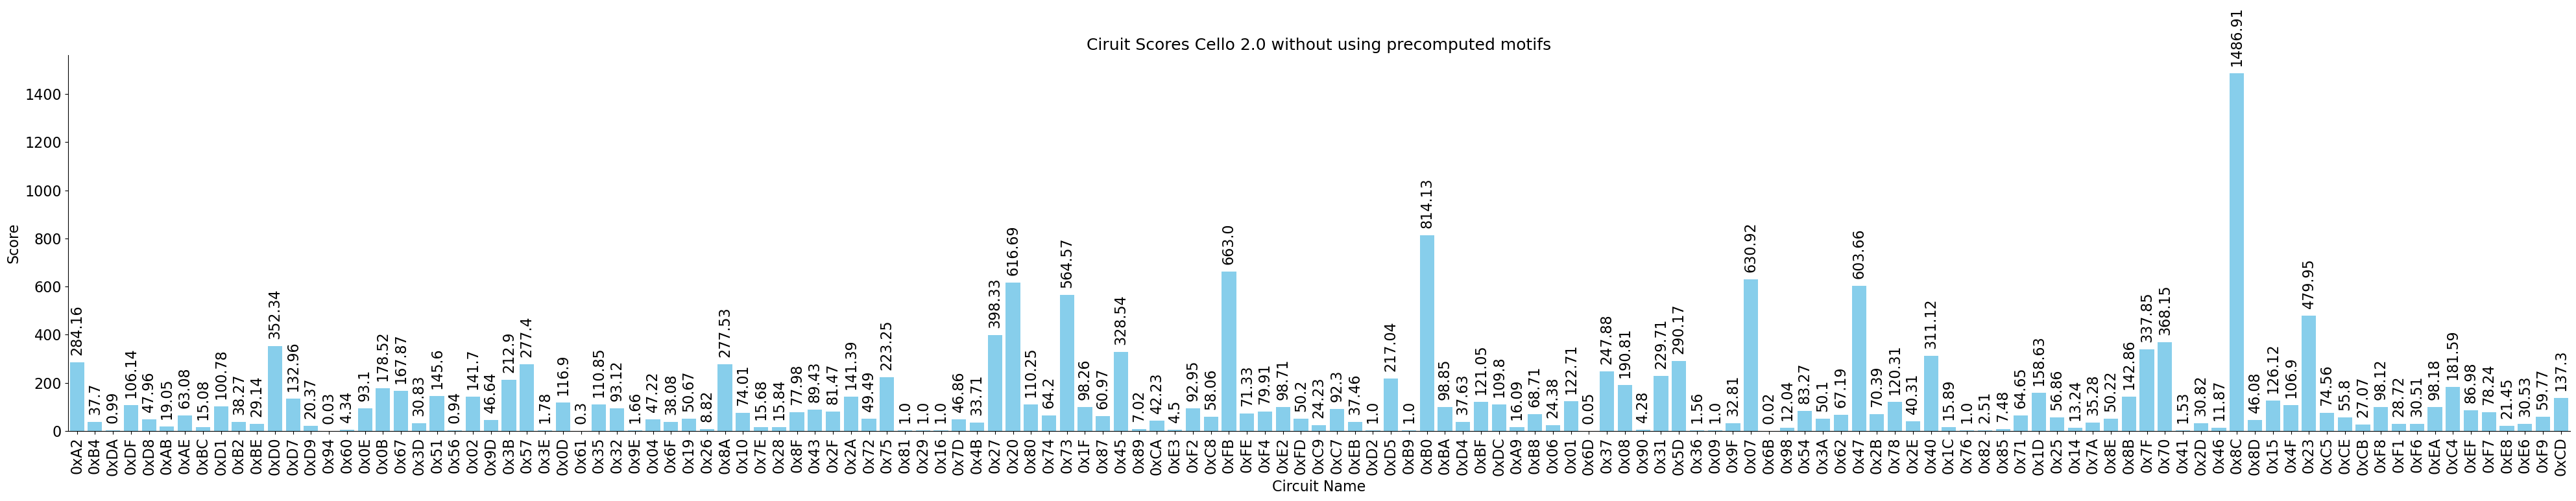

In [22]:
import matplotlib.pyplot as plt

scores_dict = output_run_postech_1_no_BetI_scores
labels = list(scores_dict.keys())
values = [scores_dict[key] if scores_dict[key] is not None else 0 for key in labels]  # Replace None with 0

# Create a bar chart
plt.figure(figsize=(40, 8))
bars = plt.bar(labels, values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    # Check if yval is not zero before rounding to avoid unnecessary labels
    if yval != 0:
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * max(values), round(yval, 2), va='bottom', ha='center', rotation=90)  # Increased y position by adding 5% of the max value

plt.xlabel('Circuit Name')
plt.ylabel('Score')
plt.title('Ciruit Scores Cello 2.0 without using precomputed motifs')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap

# Set the x-limits to fit the bars more snugly
plt.xlim(-0.5, len(labels)-0.5)

# Removing the top and right spines
ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()


Combined plot

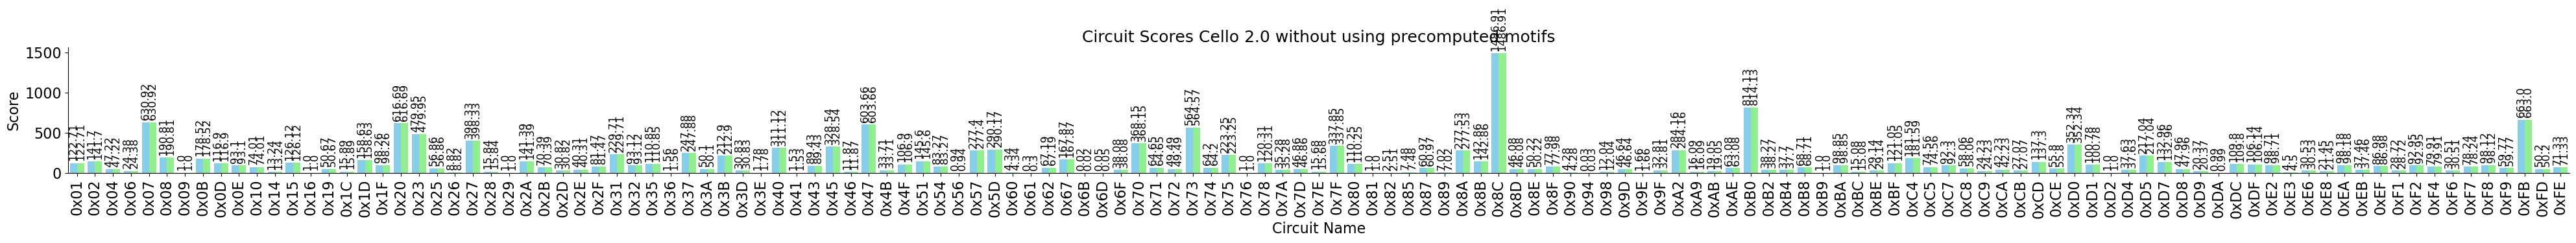

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# dictionaries
scores_dict1 = output_run_postech_1_no_BetI_scores
scores_dict2 = output_run_postech_1_no_BetI_scores

# Get a sorted list of all unique keys in both dictionaries
all_keys = sorted(set(scores_dict1.keys()) | set(scores_dict2.keys()))

# Prepare the values for each key, ensuring to check for existence and None
values1 = [scores_dict1.get(key, 0) if scores_dict1.get(key) is not None else 0 for key in all_keys]
values2 = [scores_dict2.get(key, 0) if scores_dict2.get(key) is not None else 0 for key in all_keys]

# Number of groups and bar width
num_groups = len(all_keys)
bar_width = .4  # Width of the bars

# Create the figure and axes
fig, ax = plt.subplots(figsize=(40, 4))

# Calculate bar positions
index = np.arange(num_groups)
bar1 = ax.bar(index - bar_width/2, values1, bar_width, label='Dict1', color='skyblue')
bar2 = ax.bar(index + bar_width/2, values2, bar_width, label='Dict2', color='lightgreen')

# Add value labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height != 0:
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.02 * max(max(values1), max(values2)),
                    round(height, 2), ha='center', va='bottom', rotation=90, fontsize=12)

add_labels(bar1)
add_labels(bar2)

# Final adjustments
ax.set_xlabel('Circuit Name')
ax.set_ylabel('Score')
ax.set_title('Circuit Scores Cello 2.0 without using precomputed motifs')
ax.set_xticks(index)
ax.set_xticklabels(all_keys, rotation=90)

# Set the x-limits to fit the bars more snugly
ax.set_xlim(-0.5, len(all_keys)-0.5)

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

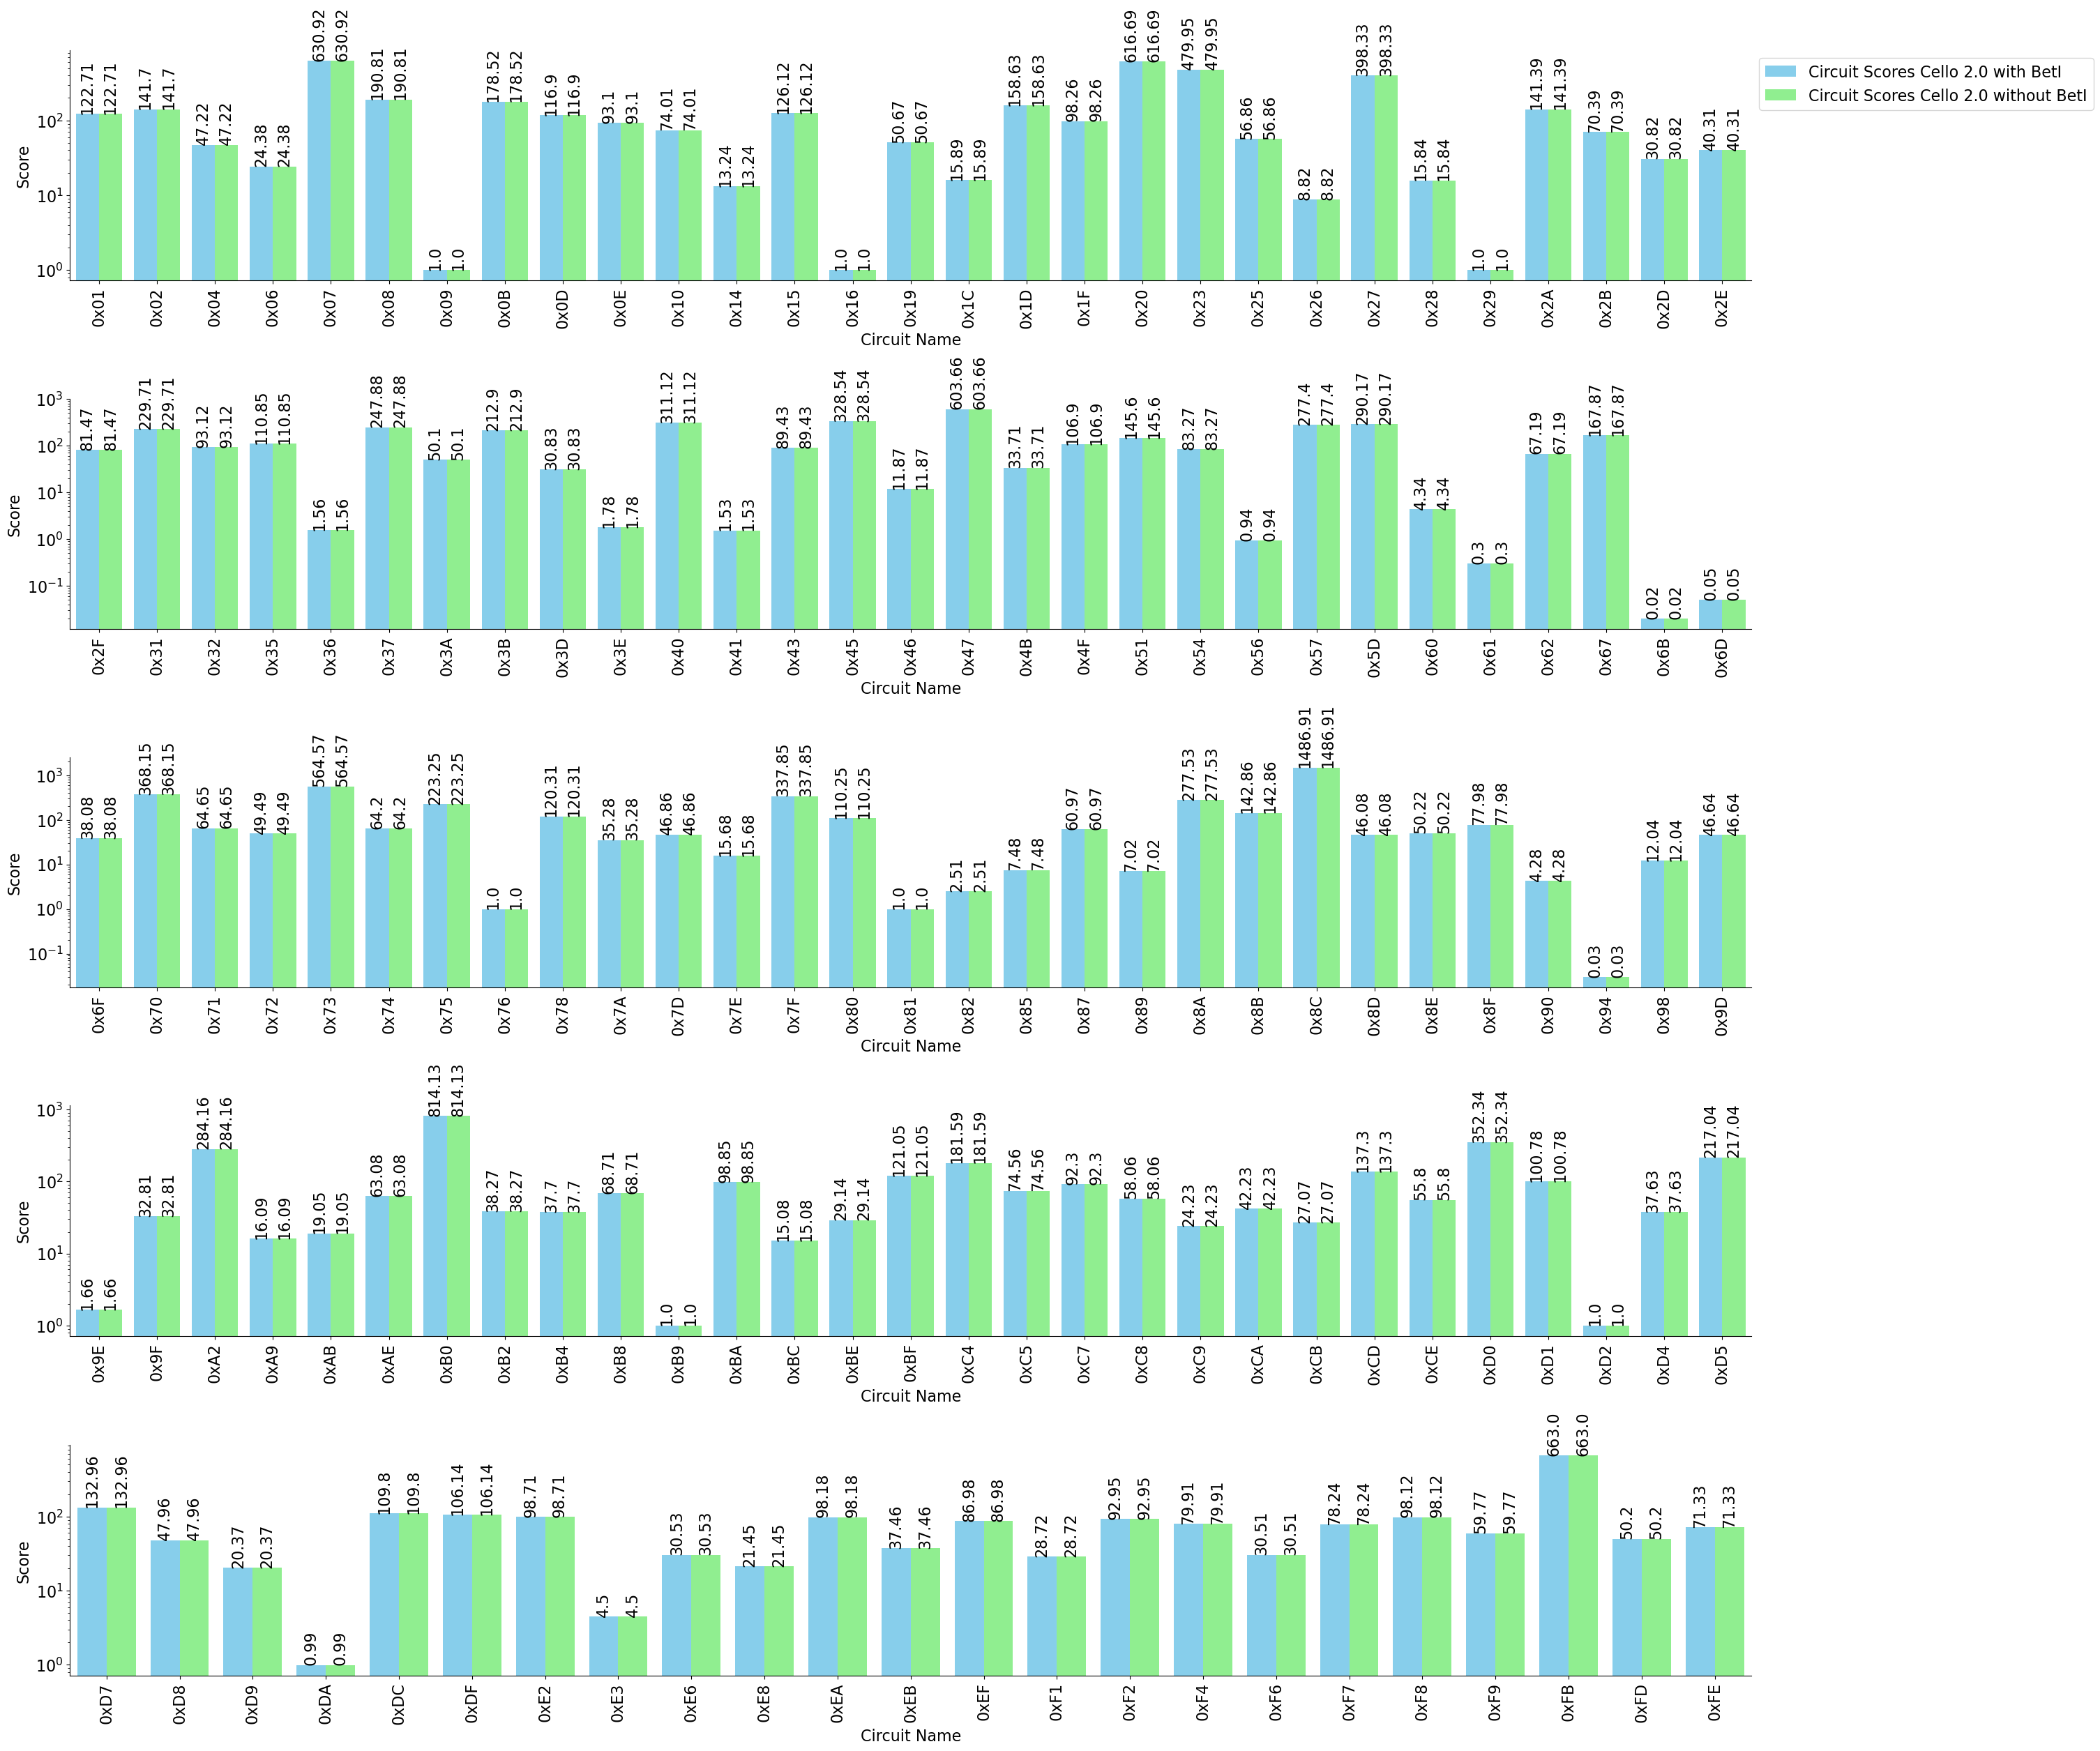

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Update font sizes
plt.rcParams.update({
    'font.size': 16,            # Default font size for all text
    'axes.labelsize': 16,       # Font size for axes labels
    'axes.titlesize': 16,       # Font size for subplot titles
    'xtick.labelsize': 16,      # Font size for X-axis tick labels
    'ytick.labelsize': 16,      # Font size for Y-axis tick labels
    'legend.fontsize': 16       # Font size for legend
})

# Dictionaries
scores_dict1 = output_run_postech_1_no_BetI_scores
scores_dict2 = output_run_postech_1_no_BetI_scores

# Get a sorted list of all unique keys in both dictionaries
all_keys = sorted(set(scores_dict1.keys()) | set(scores_dict2.keys()))

# Prepare the values for each key, ensuring to check for existence and None
values1 = [scores_dict1.get(key, 0) if scores_dict1.get(key) is not None else 0 for key in all_keys]
values2 = [scores_dict2.get(key, 0) if scores_dict2.get(key) is not None else 0 for key in all_keys]

# Parameters for subplots
num_keys_per_subplot = 29  # Adjust as needed based on total number of keys and desired subplot size
num_subplots = len(all_keys) // num_keys_per_subplot + (len(all_keys) % num_keys_per_subplot > 0)

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_subplots, 1, figsize=(30, num_subplots * 5), constrained_layout=True)
axes = np.array(axes).flatten()  # Flatten in case of a single subplot

# Function to add value labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        if height != 0:
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{round(height, 2)}', ha='center', va='bottom', rotation=90, fontsize=16)

# Loop through each subplot and plot part of the data
for i, ax in enumerate(axes):
    start = i * num_keys_per_subplot
    end = start + num_keys_per_subplot
    keys_slice = all_keys[start:end]
    values1_slice = values1[start:end]
    values2_slice = values2[start:end]
    
    index = np.arange(len(keys_slice))
    bar_width = 0.4  # Width of the bars
    
    bar1 = ax.bar(index - bar_width/2, values1_slice, bar_width, label='Circuit Scores Cello 2.0 with BetI', color='skyblue')
    bar2 = ax.bar(index + bar_width/2, values2_slice, bar_width, label='Circuit Scores Cello 2.0 without BetI', color='lightgreen')
    
    add_labels(bar1, ax)
    add_labels(bar2, ax)

    ax.set_xlabel('Circuit Name')
    ax.set_ylabel('Score')
    ax.set_yscale('log')
    #ax.set_title(f'Circuit Scores Cello 2.0 without using precomputed motifs (Part {i + 1})')
    ax.set_xticks(index)
    ax.set_xticklabels(keys_slice, rotation=90)
    ax.set_xlim(-0.5, len(keys_slice) - 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    if i == 0:  # Add legend only on the first subplot for clarity
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


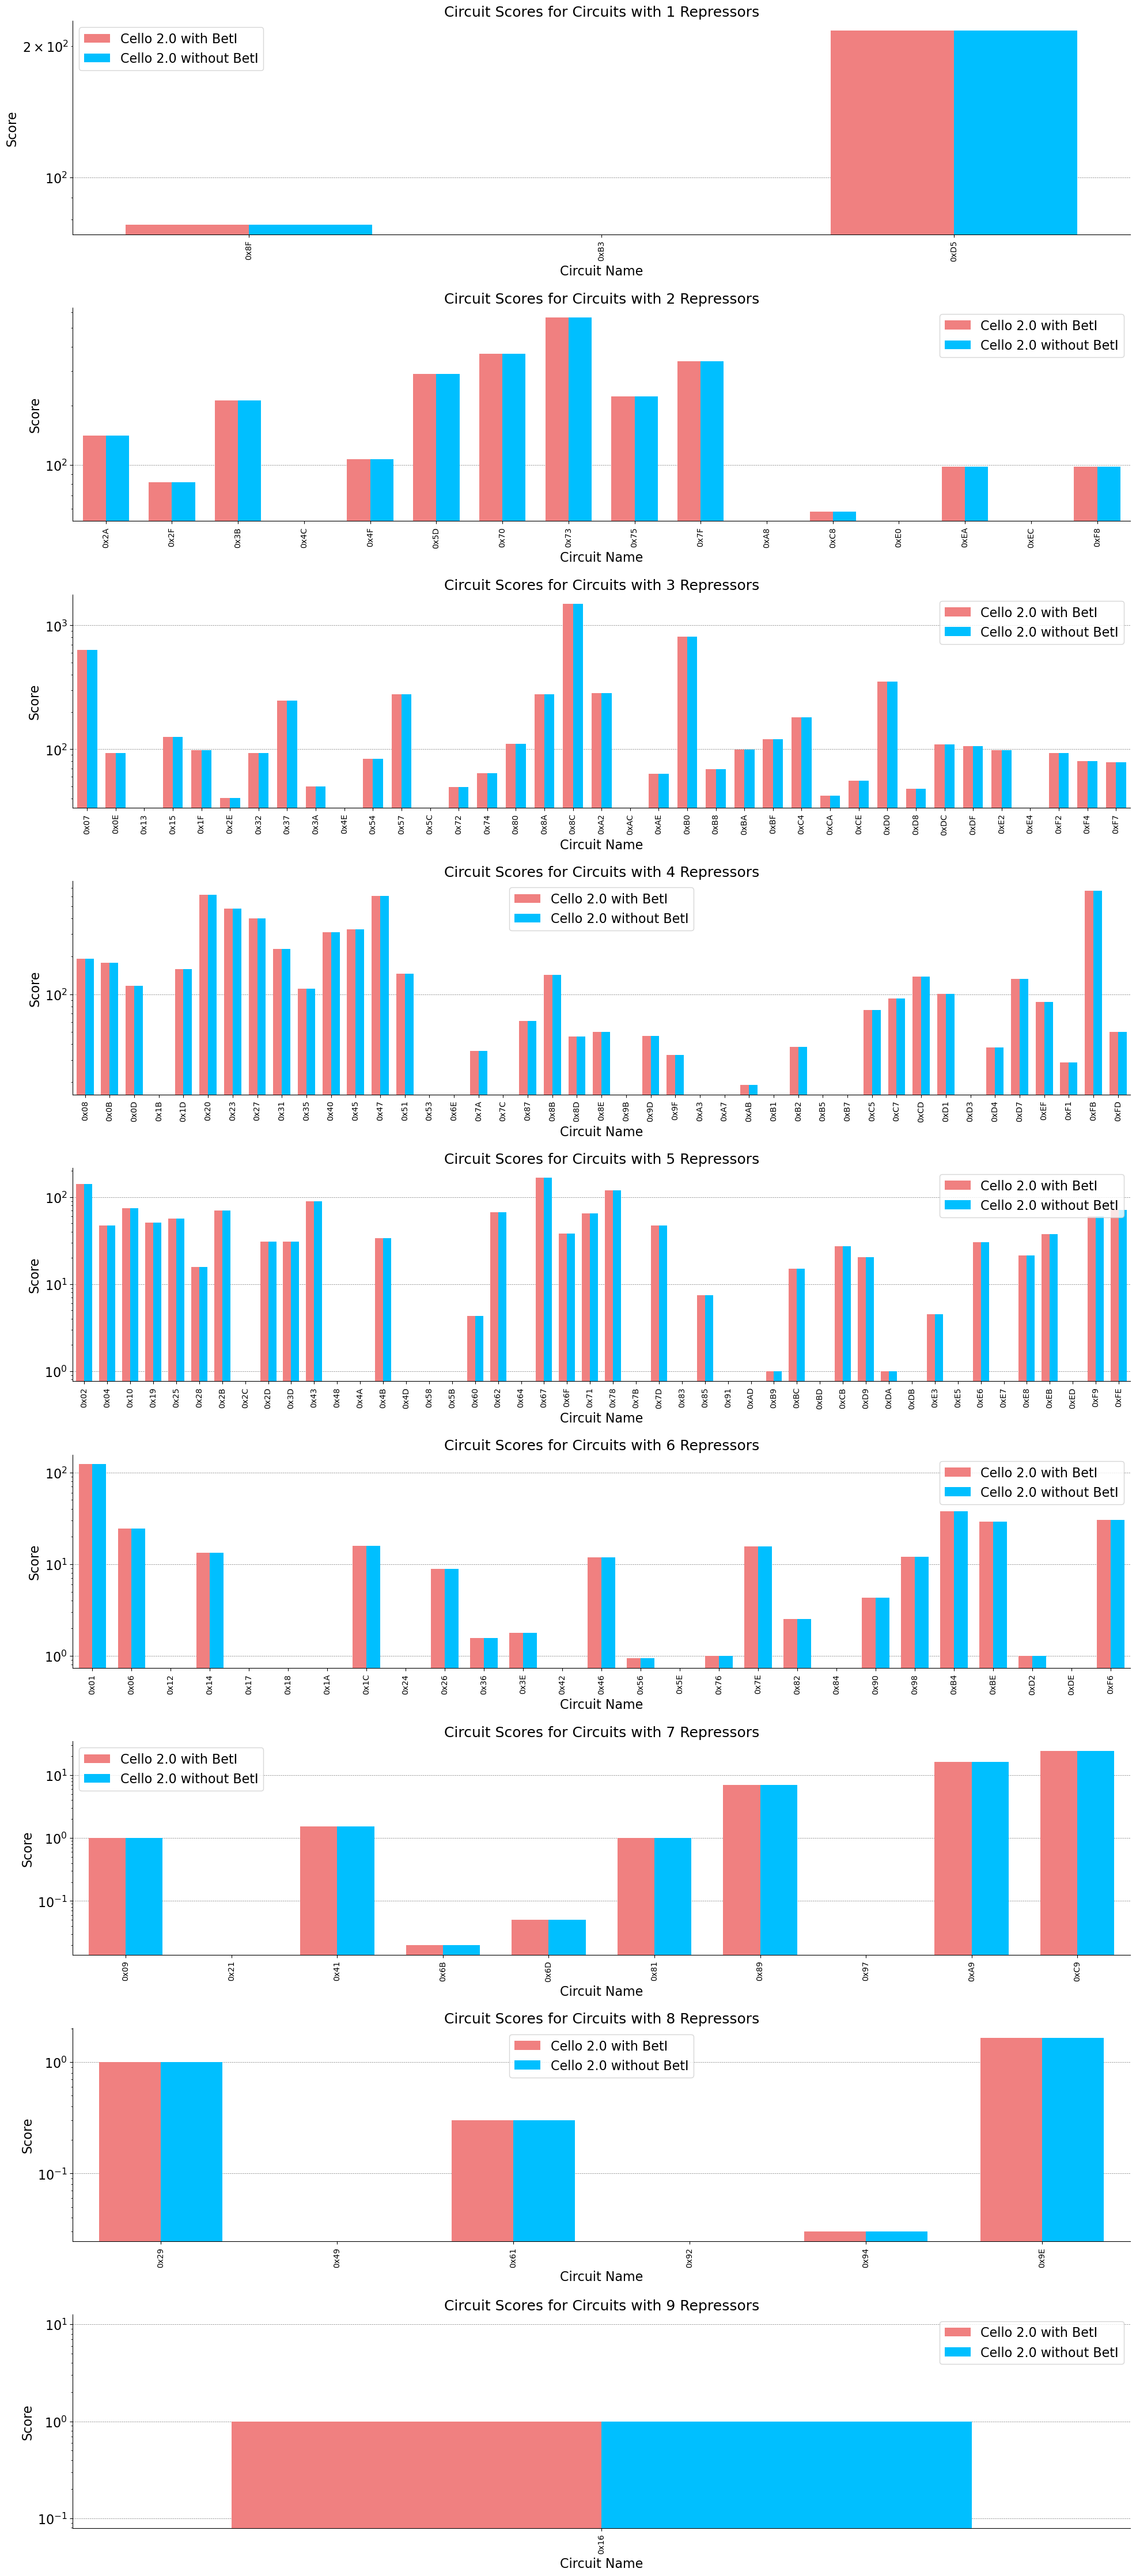

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.ticker import MultipleLocator

# Assuming 'scores_dict1', 'scores_dict2', 'graphs_dict1', and 'graphs_dict2' are defined
# Example:
# scores_dict1 = {'key1': score1, 'key2': score2, ...}
# graphs_dict1 = {'key1': graph1, 'key2': graph2, ...}

# Function to check if a graph has exactly 3 nodes with no incoming edges
def has_exactly_three_sink_nodes(graph):
    sink_nodes = [node for node in graph.nodes() if graph.in_degree(node) == 0]
    return len(sink_nodes) == 3

# Function to get adjusted node count (number of repressors)
def get_adjusted_node_count(graph):
    return graph.number_of_nodes() - 4  # Adjusting based on your specific graph structure

# Merge keys from both dictionaries and sort them
all_keys = sorted(set(graphs_dict1.keys()).union(graphs_dict2.keys()), key=lambda x: int(x, 16))

# Filter keys where both graphs (if exist) have exactly 3 sink nodes
filtered_keys = [key for key in all_keys if 
                 has_exactly_three_sink_nodes(graphs_dict1.get(key, nx.empty_graph(0))) and 
                 has_exactly_three_sink_nodes(graphs_dict2.get(key, nx.empty_graph(0)))]

# Prepare data lists for plotting using filtered keys
data = []
for key in filtered_keys:
    graph1 = graphs_dict1.get(key, nx.empty_graph(4))
    graph2 = graphs_dict2.get(key, nx.empty_graph(4))
    score1 = scores_dict1.get(key, 0)
    score2 = scores_dict2.get(key, 0)
    adjusted_node_count = get_adjusted_node_count(graph1)  # Assuming both graphs have the same node count
    data.append({
        'key': key,
        'adjusted_node_count': adjusted_node_count,
        'score1': score1,
        'score2': score2
    })

# Group data by adjusted node count
from collections import defaultdict
grouped_data = defaultdict(list)
for item in data:
    grouped_data[item['adjusted_node_count']].append(item)

# Sort the groups by adjusted node count
sorted_node_counts = sorted(grouped_data.keys())

# Now, for each group, create a plot
import math

# Determine the number of subplots (adjust as needed)
num_groups = len(sorted_node_counts)
num_cols = 1
num_rows = num_groups

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), squeeze=False)

# Update matplotlib's runtime configuration (rc) to increase font sizes
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 16
})

for idx, node_count in enumerate(sorted_node_counts):
    ax = axes[idx][0]
    group = grouped_data[node_count]
    keys = [item['key'] for item in group]
    scores1 = [item['score1'] for item in group]
    scores2 = [item['score2'] for item in group]
    
    x = np.arange(len(keys))
    width = 0.35  # the width of the bars
    
    bars1 = ax.bar(x - width/2, scores1, width, label='Cello 2.0 with BetI', color='lightcoral', zorder=3)
    bars2 = ax.bar(x + width/2, scores2, width, label='Cello 2.0 without BetI', color='deepskyblue', zorder=3)
    
    # Add labels, title, etc.
    ax.set_xlabel('Circuit Name')
    ax.set_ylabel('Score')
    ax.set_title(f'Circuit Scores for Circuits with {node_count} Repressors')
    ax.set_xticks(x)
    ax.set_xticklabels(keys, rotation=90, fontsize=10)
    ax.legend()
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust the x-limits to fit the bars more snugly
    ax.set_xlim(-0.5, len(keys) - 0.5)
    
    # Add grid lines
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5, zorder=0)
    
    # Optionally, you can set y-axis to log scale if scores vary widely
    ax.set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/86/db8pgks93ns7hycjy88b_fxw0000gn/T/ipykernel_76435/2629906509.py:115: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(y_min * 0.9, y_max * 1.1)


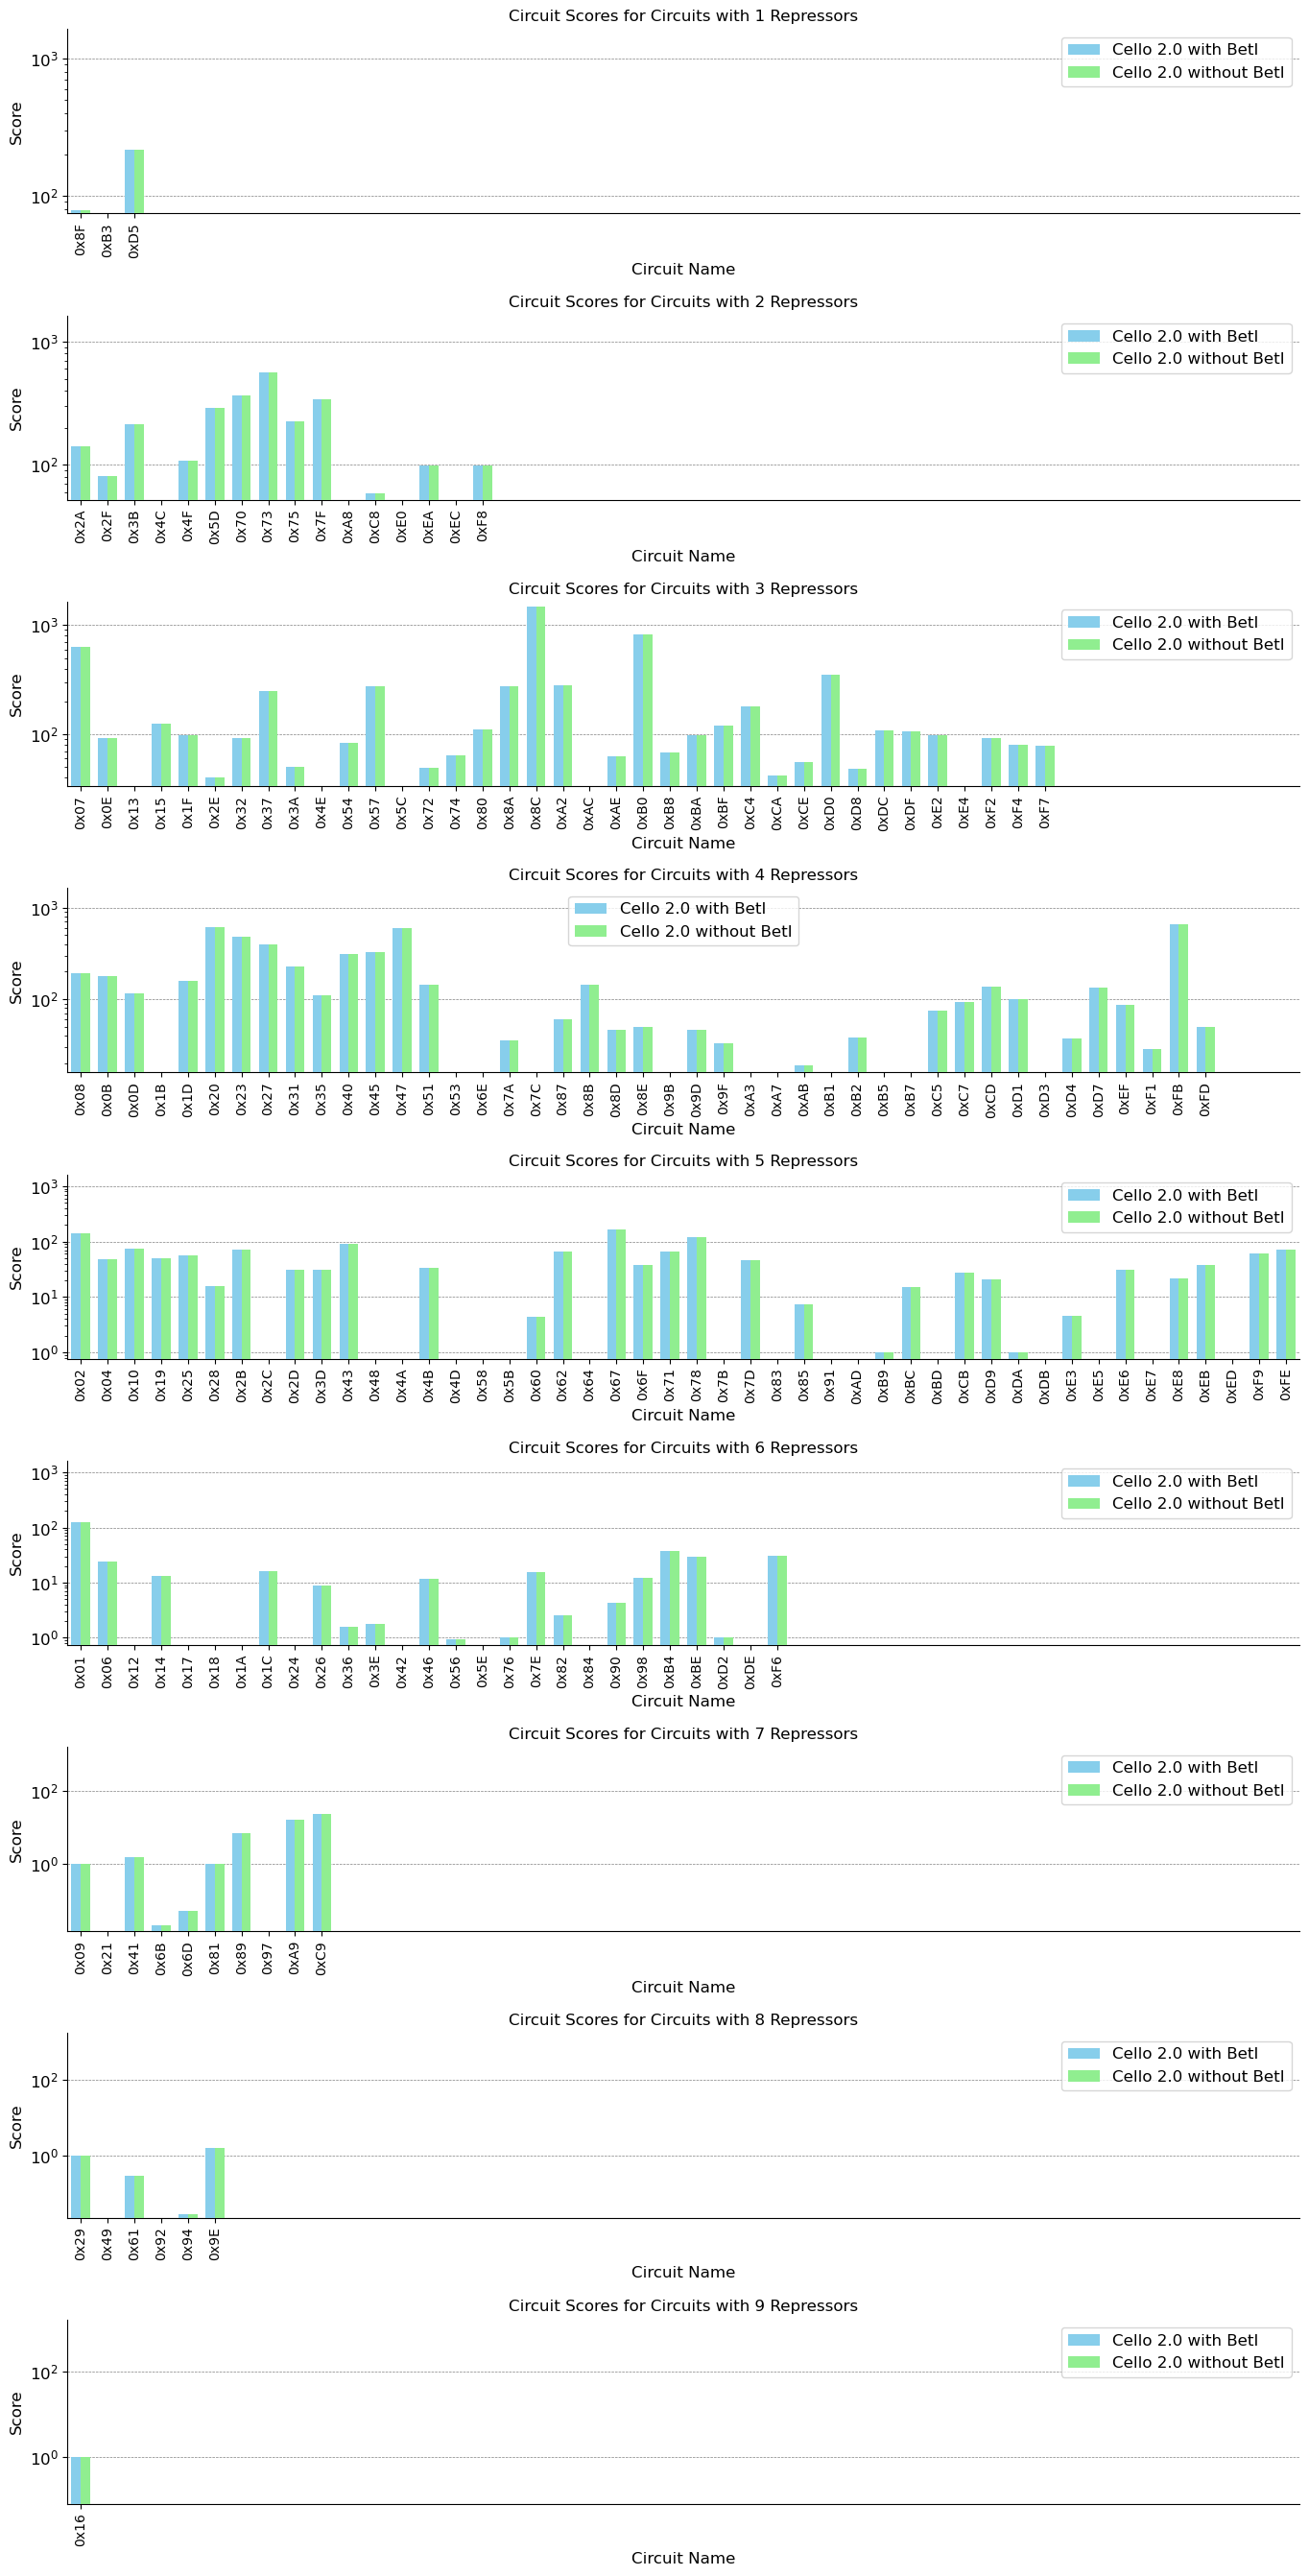

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from matplotlib.ticker import MultipleLocator
from collections import defaultdict

# Assuming 'scores_dict1', 'scores_dict2', 'graphs_dict1', and 'graphs_dict2' are defined
# Replace these with your actual data

def has_exactly_three_sink_nodes(graph):
    sink_nodes = [node for node in graph.nodes() if graph.in_degree(node) == 0]
    return len(sink_nodes) == 3

def get_adjusted_node_count(graph):
    return graph.number_of_nodes() - 4

# Merge and filter keys
all_keys = sorted(set(graphs_dict1.keys()).union(graphs_dict2.keys()), key=lambda x: int(x, 16))
filtered_keys = [key for key in all_keys if 
                 has_exactly_three_sink_nodes(graphs_dict1.get(key, nx.empty_graph(0))) and 
                 has_exactly_three_sink_nodes(graphs_dict2.get(key, nx.empty_graph(0)))]

# Prepare data
data = []
for key in filtered_keys:
    graph1 = graphs_dict1.get(key, nx.empty_graph(4))
    graph2 = graphs_dict2.get(key, nx.empty_graph(4))
    score1 = scores_dict1.get(key, 0)
    score2 = scores_dict2.get(key, 0)
    adjusted_node_count = get_adjusted_node_count(graph1)
    data.append({
        'key': key,
        'adjusted_node_count': adjusted_node_count,
        'score1': score1,
        'score2': score2
    })

# Group data
grouped_data = defaultdict(list)
for item in data:
    grouped_data[item['adjusted_node_count']].append(item)

sorted_node_counts = sorted(grouped_data.keys())

# Update matplotlib's rc parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Constants for sizing
inches_per_bar = 0.15  # Width allocated for each bar pair
height_per_plot = 3   # Height of each subplot
bar_width = 0.35      # Width of individual bars

# Find the maximum number of bars for scaling
max_bars = max(len(group) for group in grouped_data.values())
total_width = max_bars * inches_per_bar * 2  # Double the width to account for spacing

# Create figure with subplots
fig, axes = plt.subplots(len(sorted_node_counts), 1, 
                        figsize=(total_width, height_per_plot * len(sorted_node_counts)),
                        gridspec_kw={'height_ratios': [1] * len(sorted_node_counts)})

if len(sorted_node_counts) == 1:
    axes = [axes]

# Find global y-axis limits
all_scores = []
for group in grouped_data.values():
    all_scores.extend([item['score1'] for item in group])
    all_scores.extend([item['score2'] for item in group])
y_min, y_max = min(all_scores), max(all_scores)

# Create plots
for idx, node_count in enumerate(sorted_node_counts):
    ax = axes[idx]
    group = grouped_data[node_count]
    num_bars = len(group)
    
    keys = [item['key'] for item in group]
    scores1 = [item['score1'] for item in group]
    scores2 = [item['score2'] for item in group]
    
    x = np.arange(num_bars)
    
    # Plot bars
    bars1 = ax.bar(x - bar_width/2, scores1, bar_width, label='Cello 2.0 with BetI', color='skyblue', zorder=3)
    bars2 = ax.bar(x + bar_width/2, scores2, bar_width, label='Cello 2.0 without BetI', color='lightgreen', zorder=3)
    
    # Styling
    ax.set_xlabel('Circuit Name')
    ax.set_ylabel('Score')
    ax.set_title(f'Circuit Scores for Circuits with {node_count} Repressors')
    ax.set_xticks(x)
    ax.set_xticklabels(keys, rotation=90, fontsize=10)
    ax.legend()
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set consistent x-limits for all plots
    ax.set_xlim(-0.5, max_bars - 0.5)
    
    # Add grid
    ax.grid(which='major', axis='y', linestyle='--', color='grey', linewidth=0.5, zorder=0)
    
    # Set y-axis to log scale and consistent limits
    ax.set_yscale('log')
    ax.set_ylim(y_min * 0.9, y_max * 1.1)

# Adjust layout
plt.tight_layout()
plt.show()

Save topologies designed by Cello:

In [ ]:
import pickle

with open('output_run_postech_1_graphs.pkl', 'wb') as f:
    pickle.dump(output_run_postech_1_graphs, f)
